In [181]:
#importing the requisite libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [182]:
#Loading the data

house = pd.read_csv('train.csv')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [183]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [184]:
house.shape

(1460, 81)

In [185]:
#Checking for Percentage of missing Values

(house.isnull().mean()[house.isnull().mean()>0]*100).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [186]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [187]:
#Dropping Coulmns with Maximum missing values

house = house.loc[:,(house.isnull().sum()/len(house)*100)<50]

In [188]:
house.shape

(1460, 77)

In [189]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [190]:
#Checking for percentage of missing values again

(house.isnull().mean()[house.isnull().mean()>0]*100).sort_values(ascending=False)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [191]:
#Check for unique values in FireplaceQu

house.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [192]:
#Fill FireplaceQu with NA since the value is Null it should be NA

house.FireplaceQu = house.FireplaceQu.fillna('NA')

In [193]:
#Checking for percentage of missing values again

(house.isnull().mean()[house.isnull().mean()>0]*100).sort_values(ascending=False)

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [194]:
#Check for unique values in LotFrontage

house.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [195]:
#check median of LotFrontage
LotFrontage_median = house.LotFrontage.median()
LotFrontage_median

69.0

In [196]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house.LotFrontage = house.LotFrontage.fillna(LotFrontage_median)

In [197]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house.MasVnrArea = house.MasVnrArea.fillna(house.MasVnrArea.median()) 

In [198]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house.MasVnrType = house.MasVnrType.fillna('None')

In [199]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house.BsmtQual = house.BsmtQual.fillna('NA')

In [200]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house.BsmtCond = house.BsmtCond.fillna('NA')

In [201]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house.BsmtExposure = house.BsmtExposure.fillna('No')

In [202]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house.BsmtFinType1 = house.BsmtFinType1.fillna('NA')

In [203]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house.BsmtFinType2 = house.BsmtFinType2.fillna('NA')

In [204]:
#impute missing values of Electrical with mode due to categorical column
house.Electrical = house.Electrical.fillna(house.Electrical.mode()[0])

In [205]:
#replace Nan values of GarageType with NA i.e. No Garage
house.GarageType = house.GarageType.fillna('NA')

In [206]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house.GarageYrBlt = house.GarageYrBlt.fillna(0)

In [207]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house.GarageFinish = house.GarageFinish.fillna('NA')

In [208]:
#replace Nan values of GarageQual with NA i.e. No Garage
house.GarageQual = house.GarageQual.fillna('NA')

In [209]:
#replace Nan values of GarageCond with NA i.e. No Garage
house.GarageCond = house.GarageCond.fillna('NA')

In [210]:
#Checking for percentage of missing values again

(house.isnull().mean()[house.isnull().mean()>0]*100).sort_values(ascending=False)

Series([], dtype: float64)

In [211]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house['Ageofhouse'] = house.YrSold - house.YearBuilt

In [212]:
#Drop YrSold, YearBuilt after HouseAge
house=house.drop(columns=['YrSold', 'YearBuilt'])

In [213]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house = house.astype(convert_dict)

In [214]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [215]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house = house.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [216]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house = house.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [217]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house = house.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [218]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [219]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house = house.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [220]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house = house.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [221]:
house.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [222]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

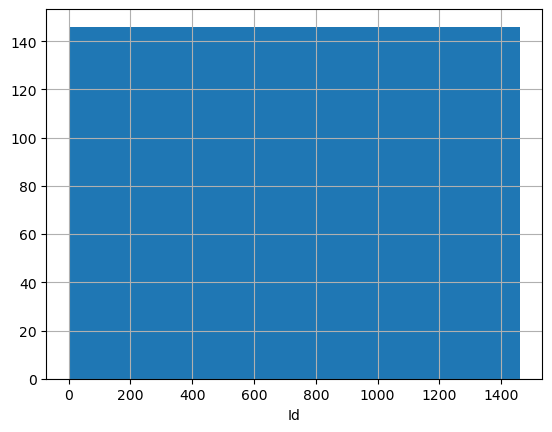

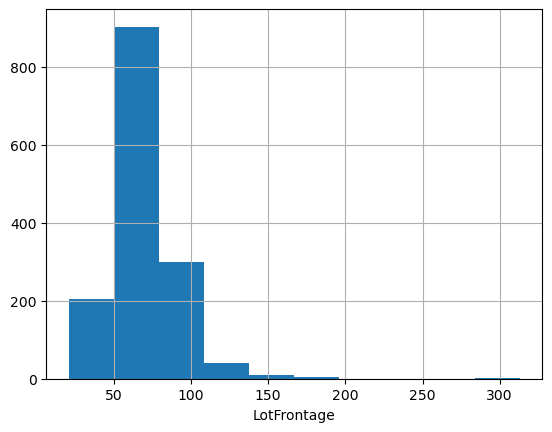

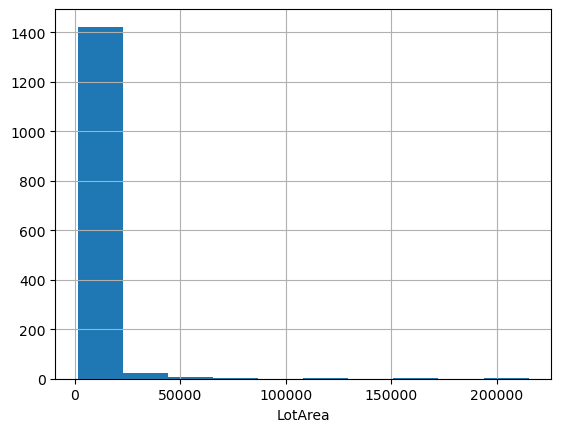

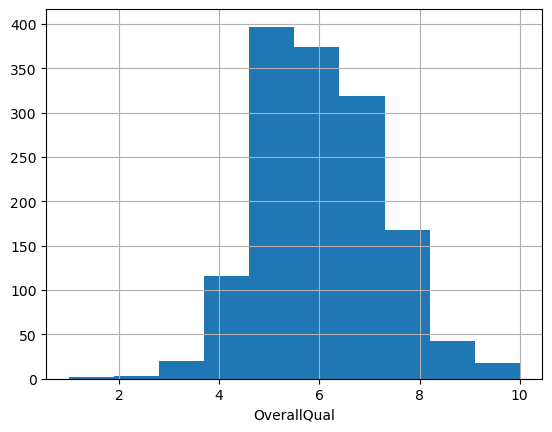

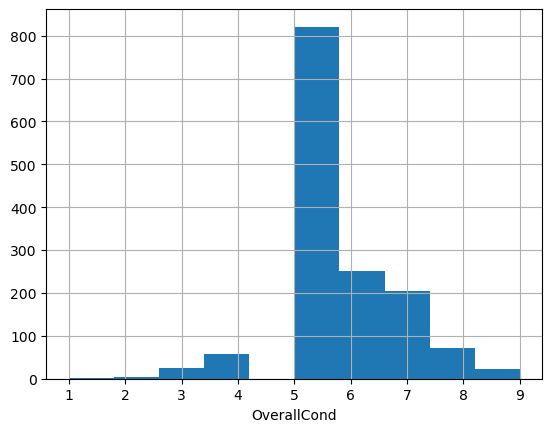

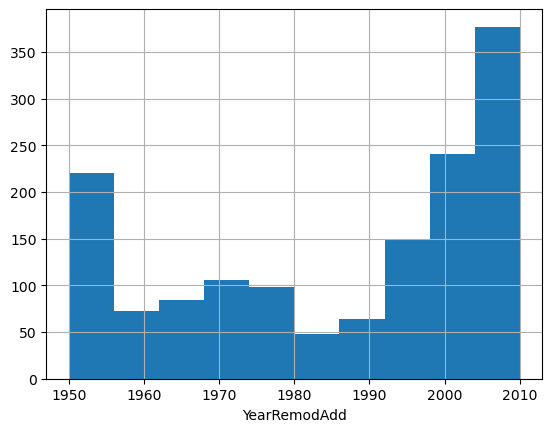

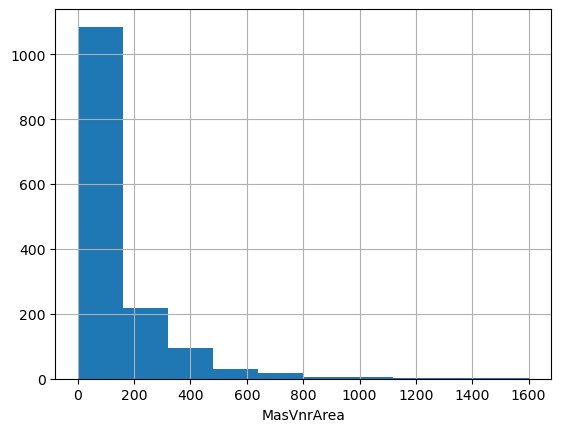

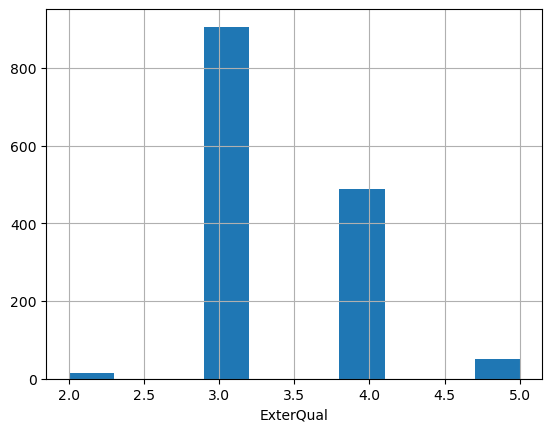

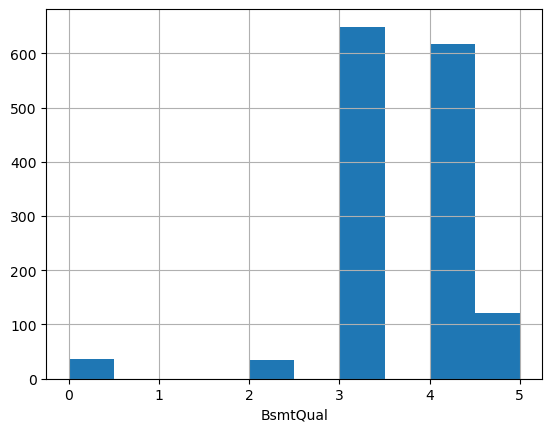

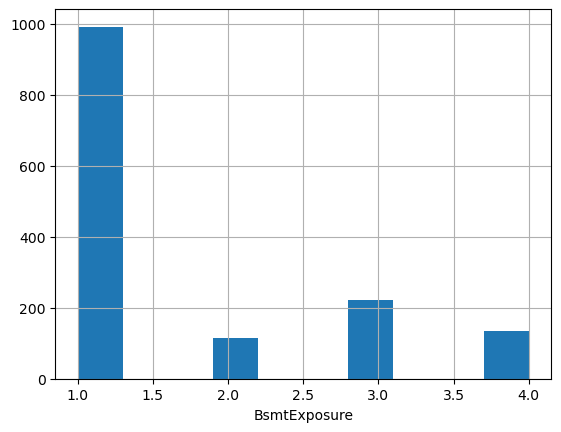

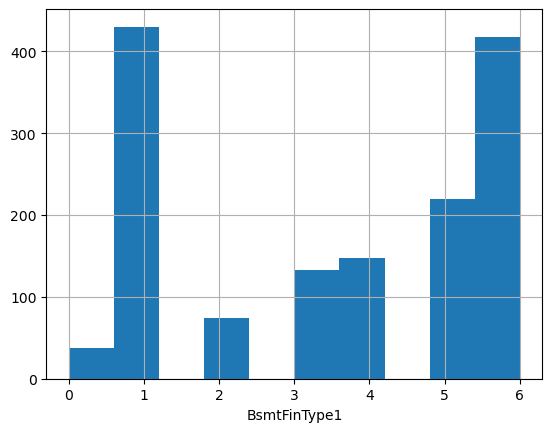

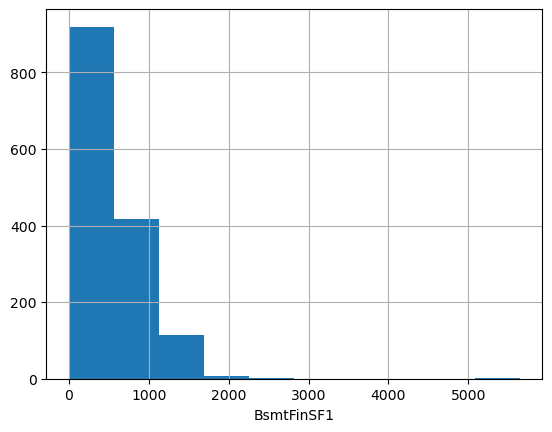

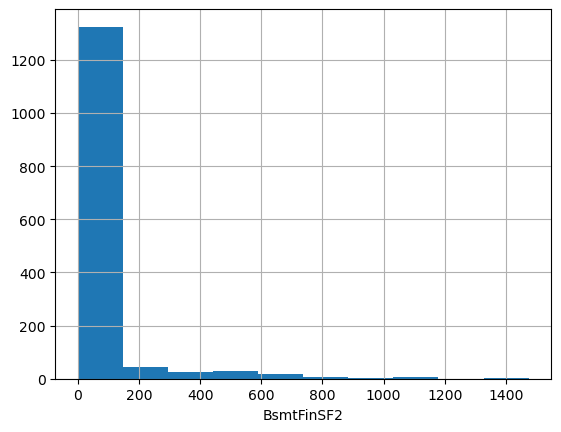

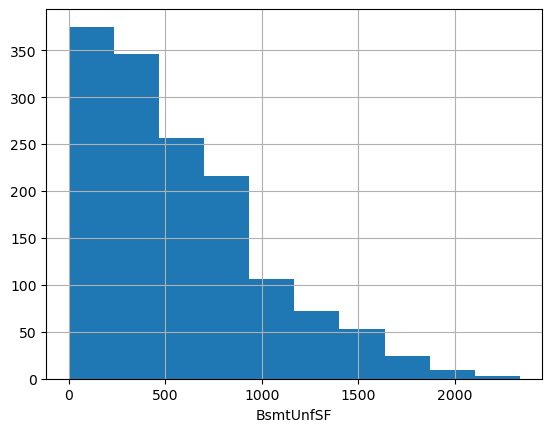

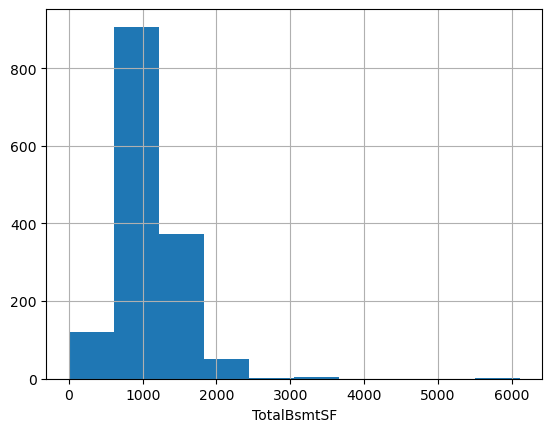

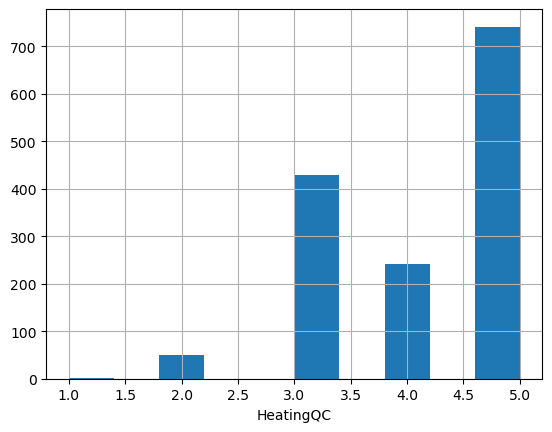

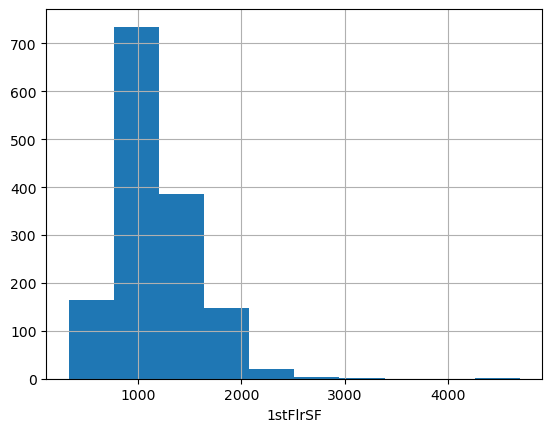

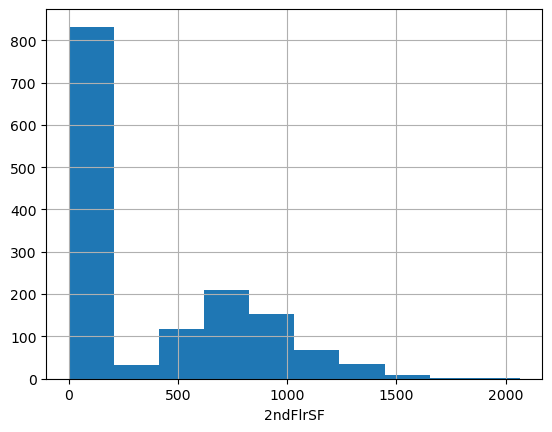

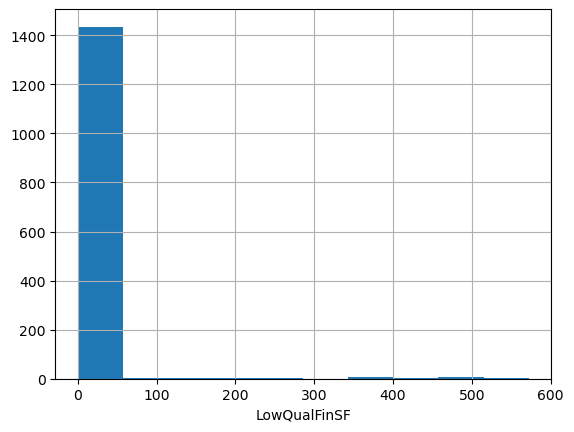

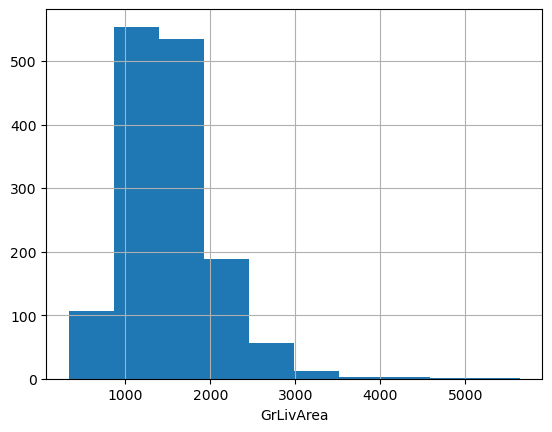

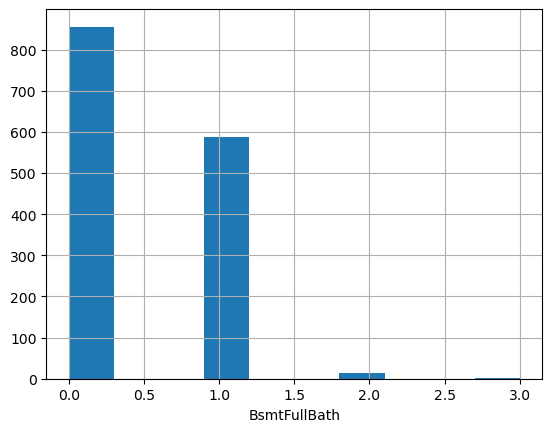

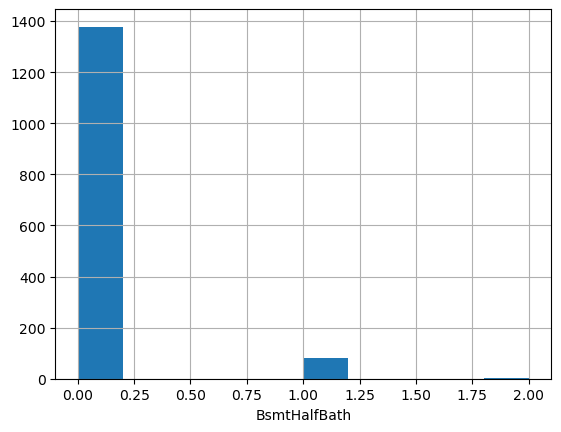

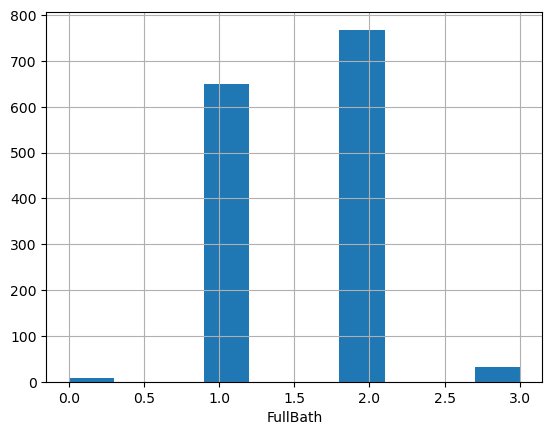

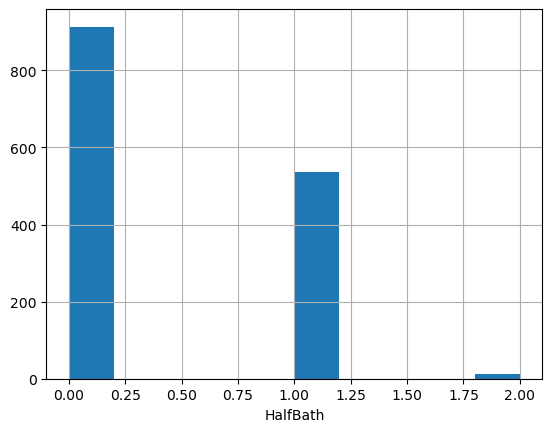

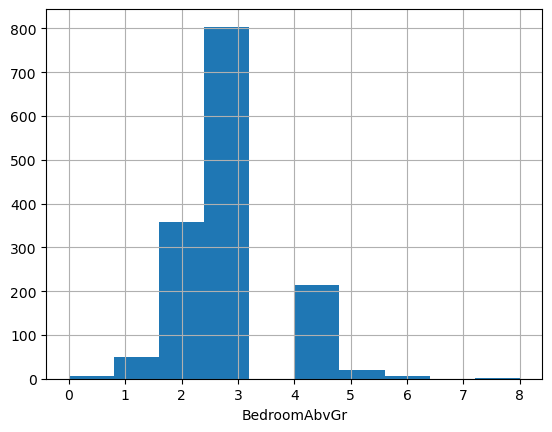

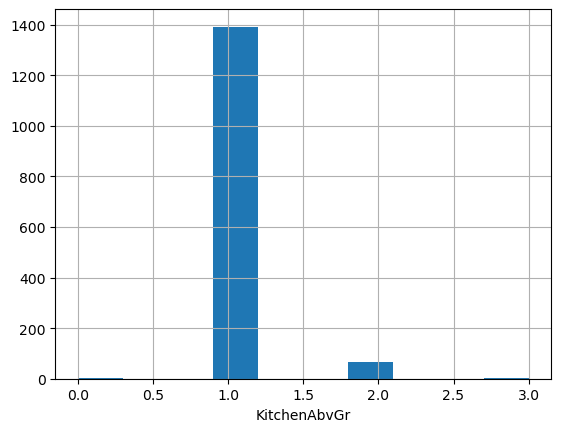

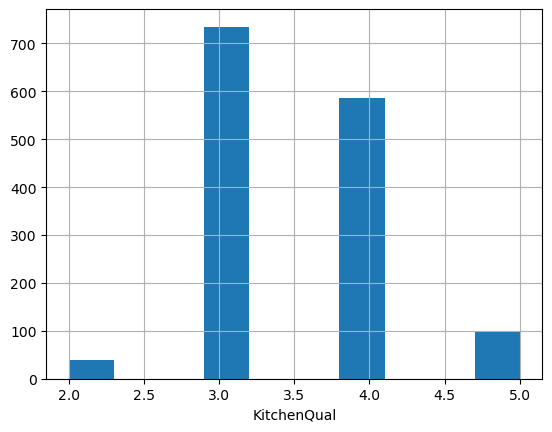

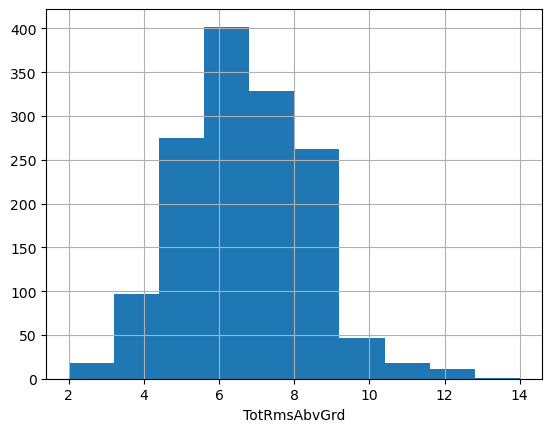

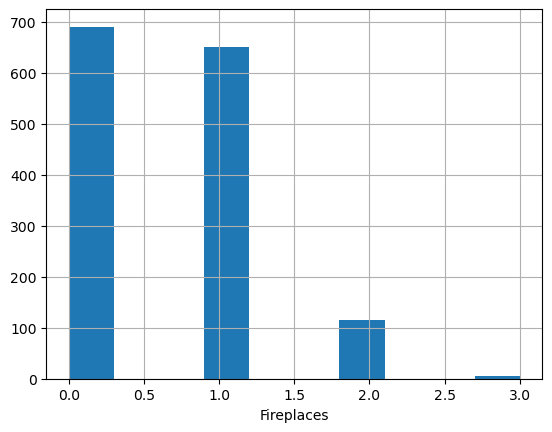

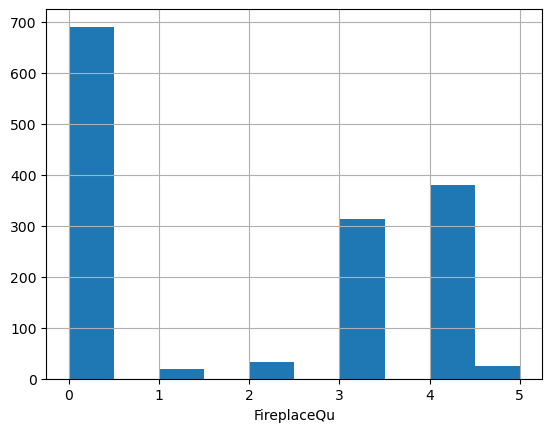

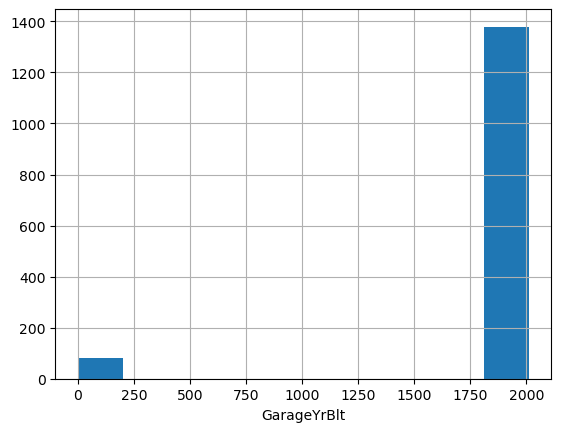

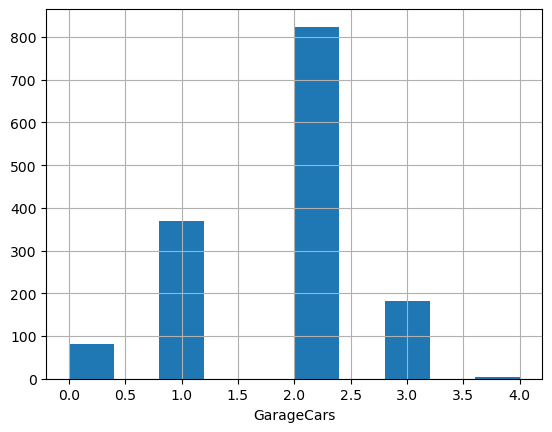

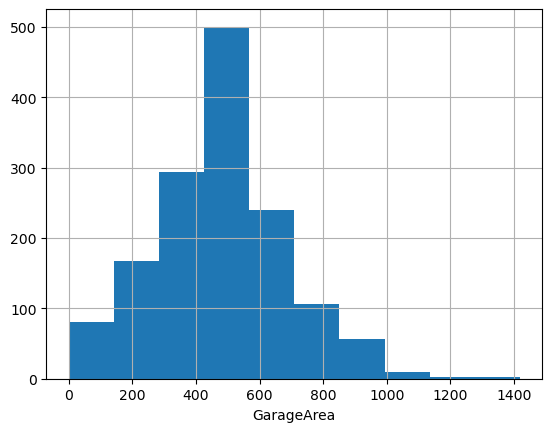

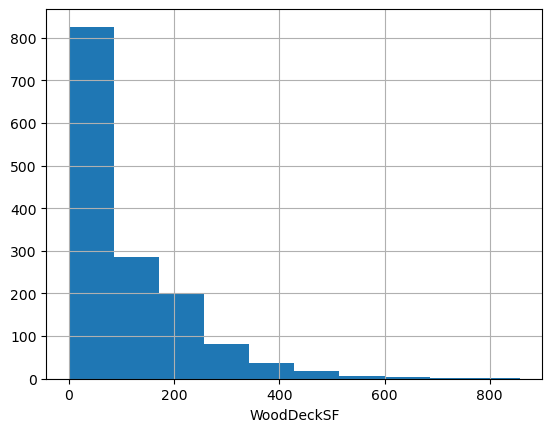

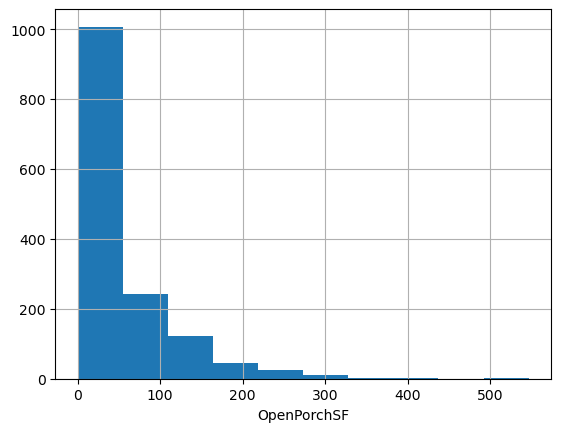

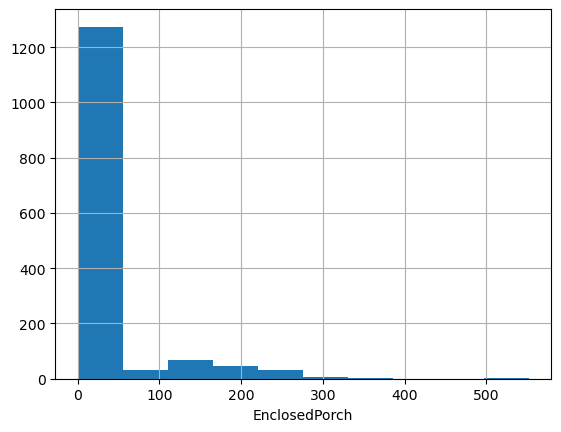

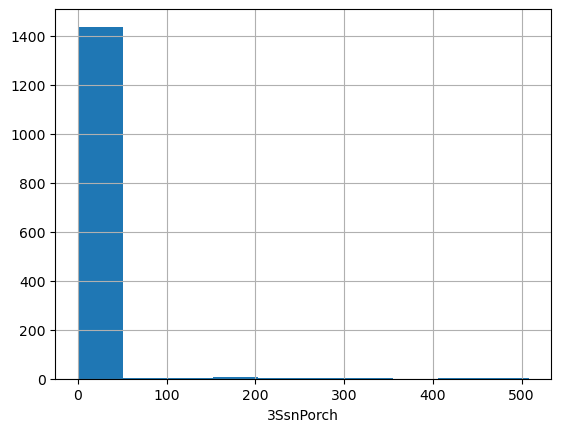

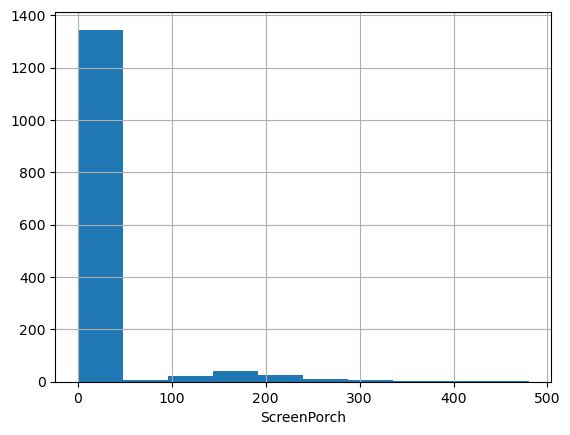

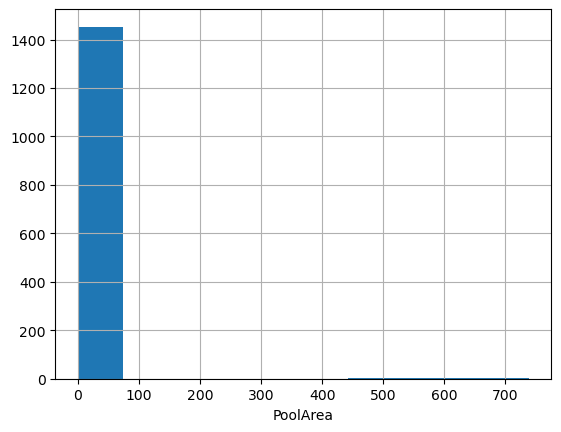

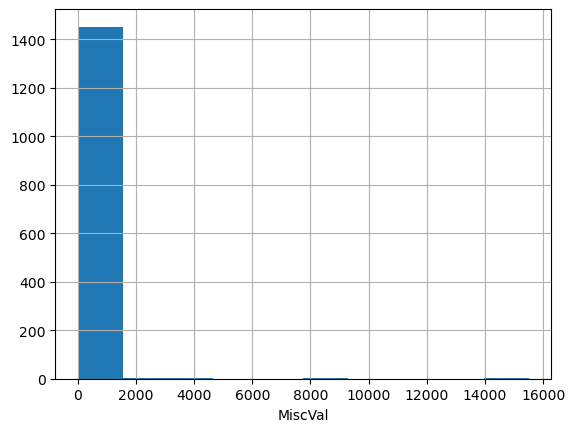

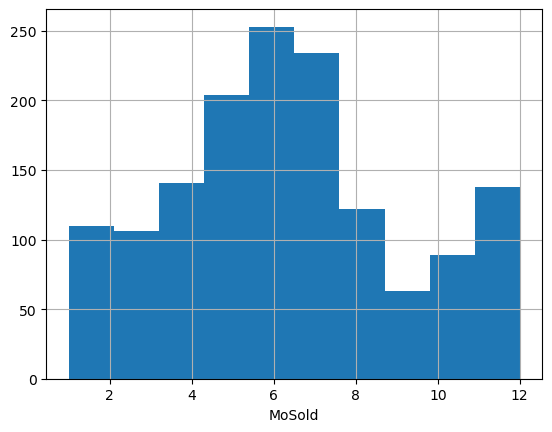

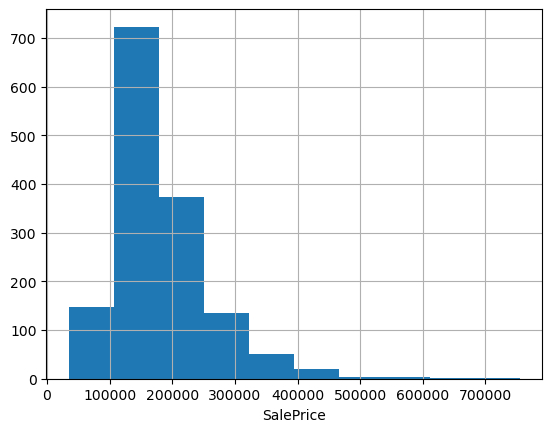

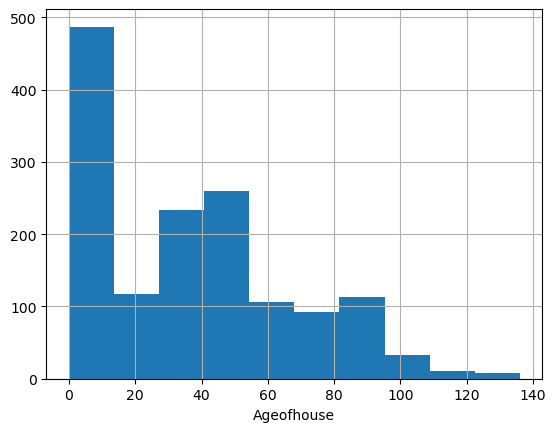

In [223]:
#checking for skewness in numerical data
numerical_features=[feature for feature in house.columns if house[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        
        house[feature].hist()
        plt.xlabel(feature)
        plt.show()

The histograms above describe the skewness of the data. They also suggest that LowQualFinSF, PoolArea, MiscVal and 3SsnPorch contain very little variety in values. This observation is checked through value_counts in next step.

In [224]:
print(house['LowQualFinSF'].value_counts())
print(house['PoolArea'].value_counts())
print(house['MiscVal'].value_counts())
print(house['3SsnPorch'].value_counts())

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304 

Value_count confirms that there is a variation in the value and we could see high outliers as well. So proceeding to drop the columns LowQualFinSF, PoolArea, MiscVal and 3SsnPorch

In [225]:
#Dropping the biased coulmns

house=house.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)

In [226]:
house.shape

(1460, 72)

In [227]:
house.describe()

Id  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    69.863699   10516.828082     6.099315     5.575342   
std     421.610009    22.027677    9981.264932     1.382997     1.112799   
min       1.000000    21.000000    1300.000000     1.000000     1.000000   
25%     365.750000    60.000000    7553.500000     5.000000     5.000000   
50%     730.500000    69.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    79.000000   11601.500000     7.000000     6.000000   
max    1460.000000   313.000000  215245.000000    10.000000     9.000000   

       YearRemodAdd   MasVnrArea   ExterQual     BsmtQual  BsmtExposure  ...  \
count   1460.000000  1460.000000  1460.00000  1460.000000   1460.000000  ...   
mean    1984.865753   103.117123     3.39589     3.489041      1.656164  ...   
std       20.645407   180.731373     0.57428     0.876478      1.039123  ...   
min     1950.000000     0.000000     2.00000     0.000000      1.000000  ...   
25%     1967.000000     0.000000     3.00000     3.000000      1.000000  ...   
50%     1994.000000     0.000000     3.00000     4.000000      1.000000  ...   
75%     2004.000000   164.250000     4.00000     4.000000      2.000000  ...   
max     2010.000000  1600.000000     5.00000     5.000000      4.000000  ...   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1868.739726     1.767123   472.980137    94.244521    46.660274   
std     453.697295     0.747315   213.804841   125.338794    66.256028   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1958.000000     1.000000   334.500000     0.000000     0.000000   
50%    1977.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2010.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch  ScreenPorch       MoSold      SalePrice   Ageofhouse  
count    1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  
mean       21.954110    15.060959     6.321918  180921.195890    36.547945  
std        61.119149    55.757415     2.703626   79442.502883    30.250152  
min         0.000000     0.000000     1.000000   34900.000000     0.000000  
25%         0.000000     0.000000     5.000000  129975.000000     8.000000  
50%         0.000000     0.000000     6.000000  163000.000000    35.000000  
75%         0.000000     0.000000     8.000000  214000.000000    54.000000  
max       552.000000   480.000000    12.000000  755000.000000   136.000000  

[8 rows x 39 columns]

## Checking for Outlier

We found outliers for few columns easily but for columns which seems to be normally distributed could have outliers as well. Let us check that and address it.

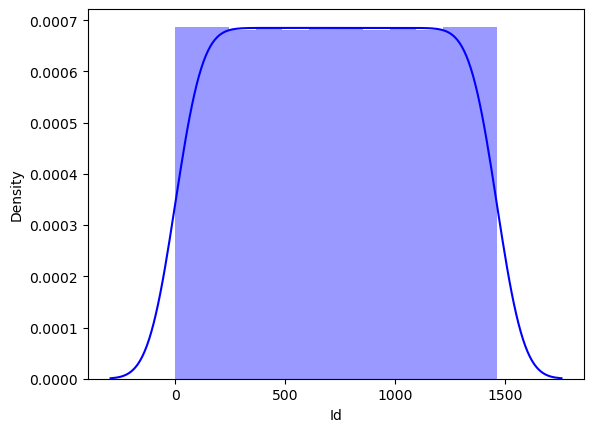

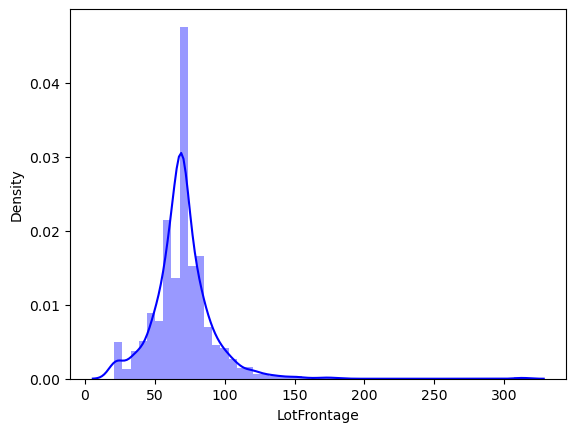

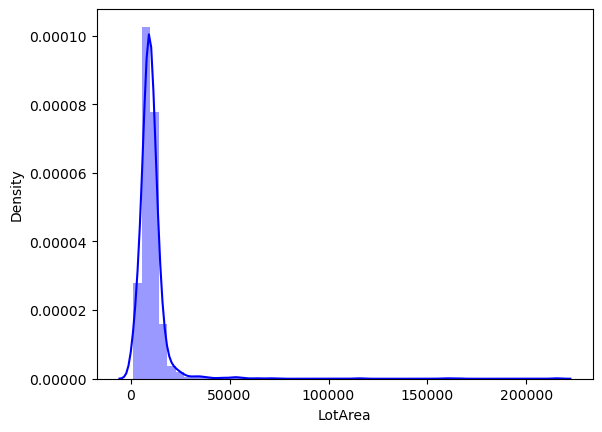

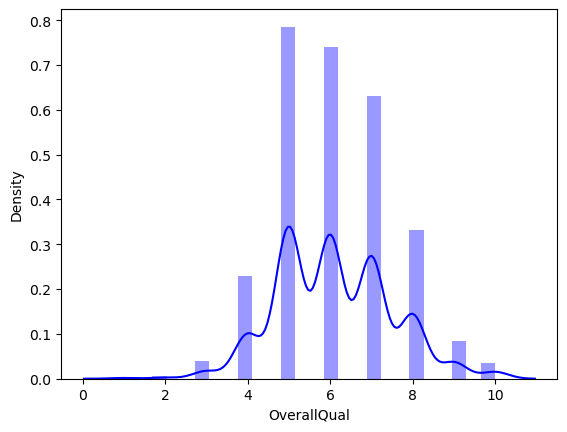

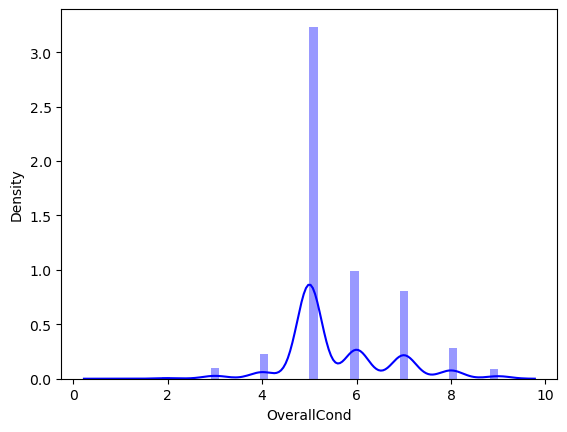

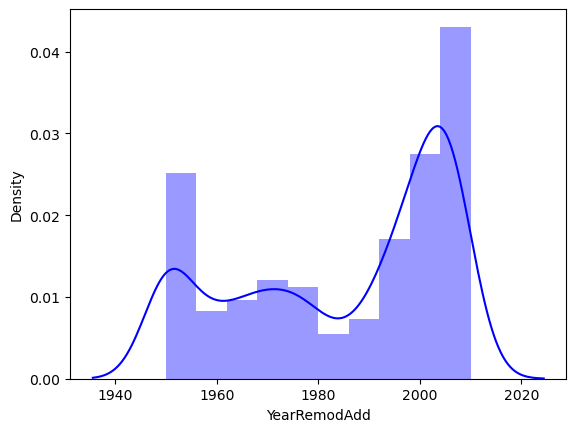

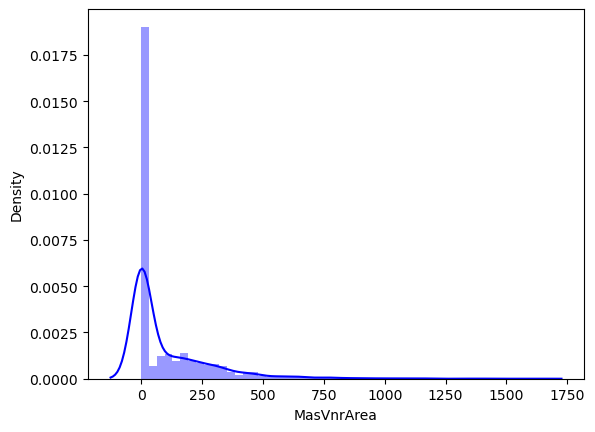

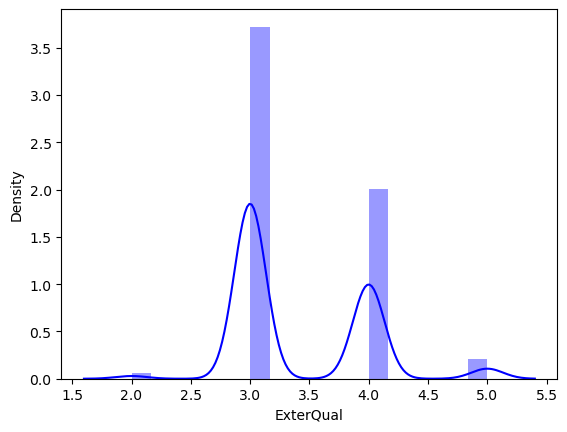

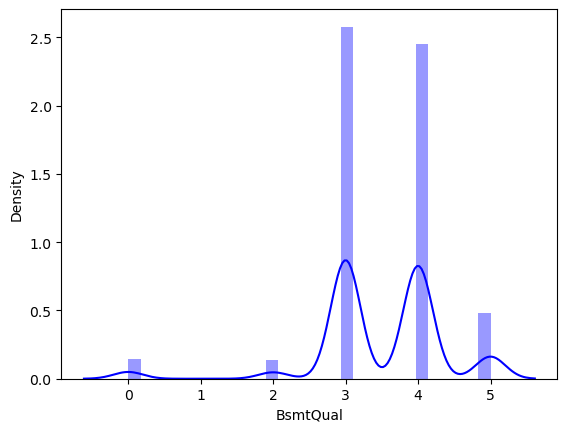

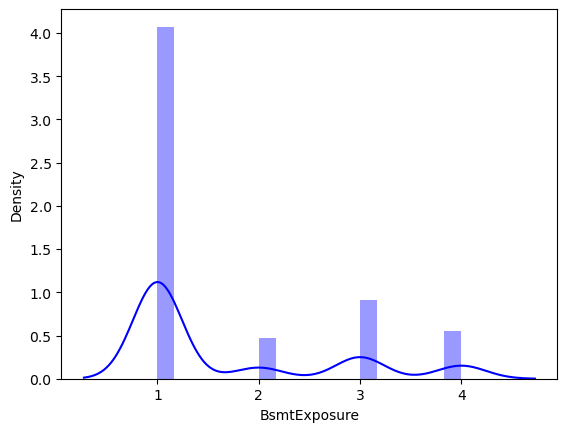

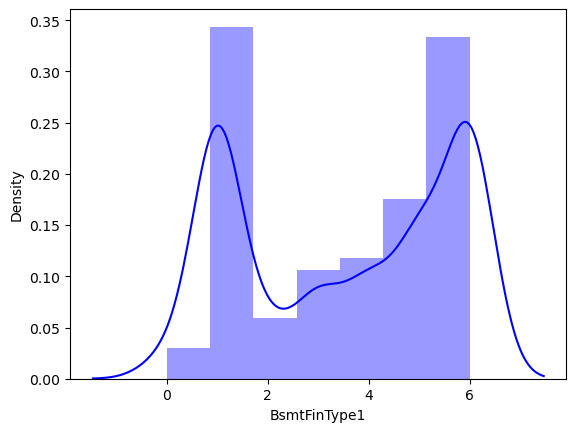

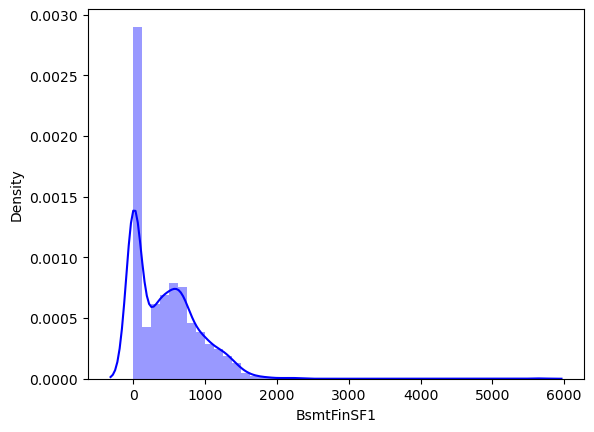

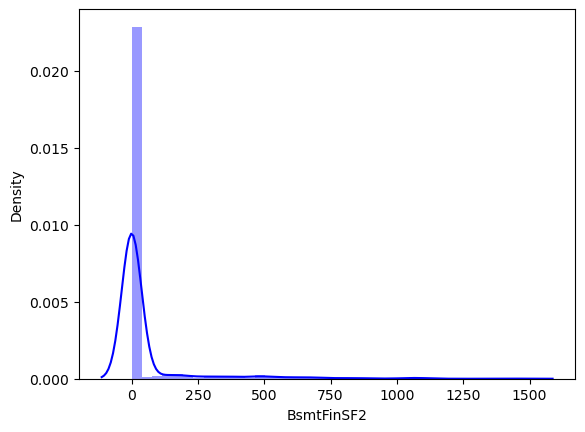

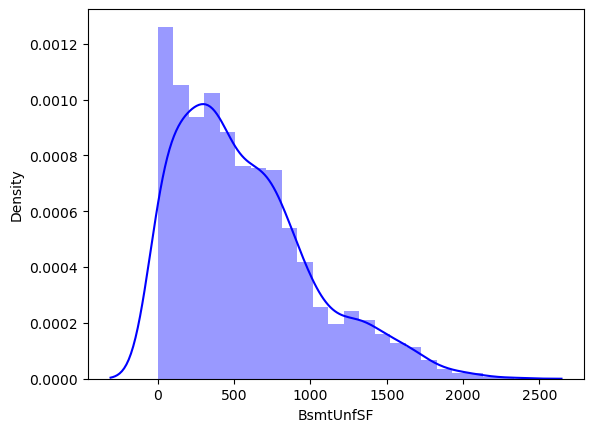

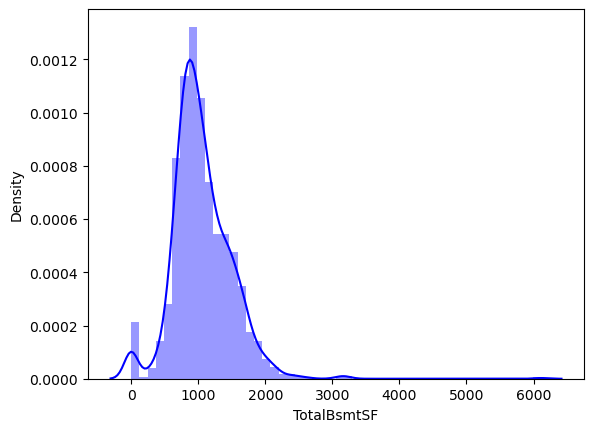

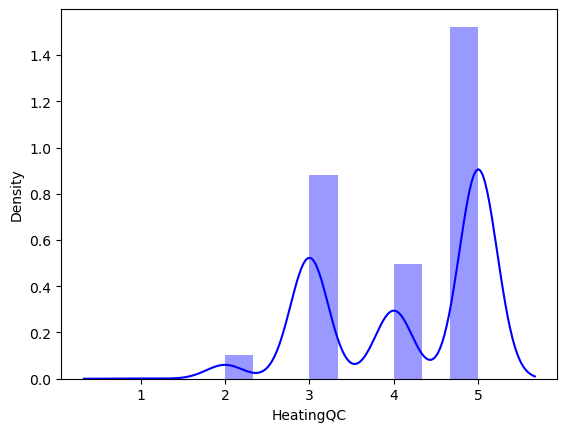

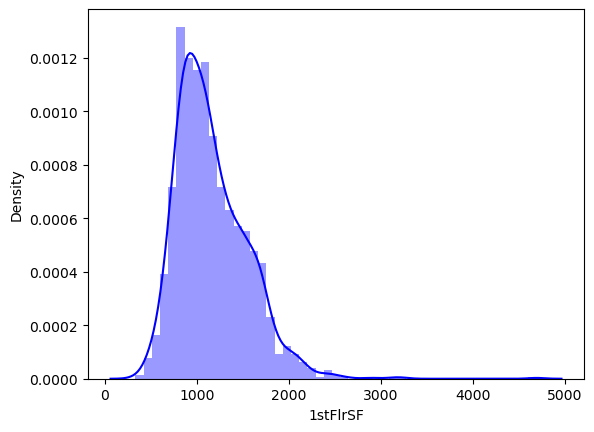

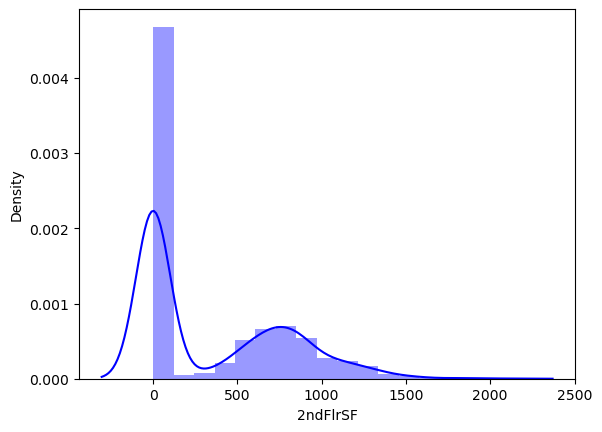

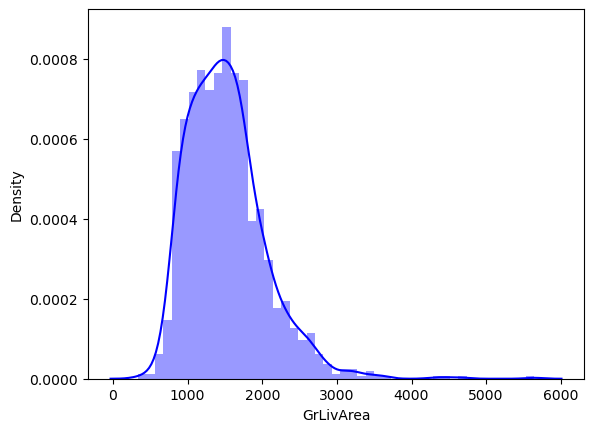

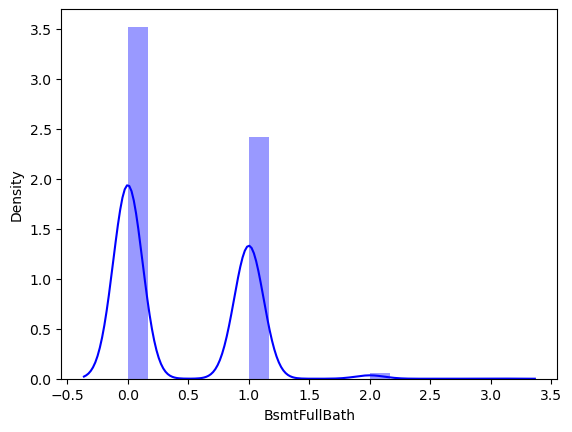

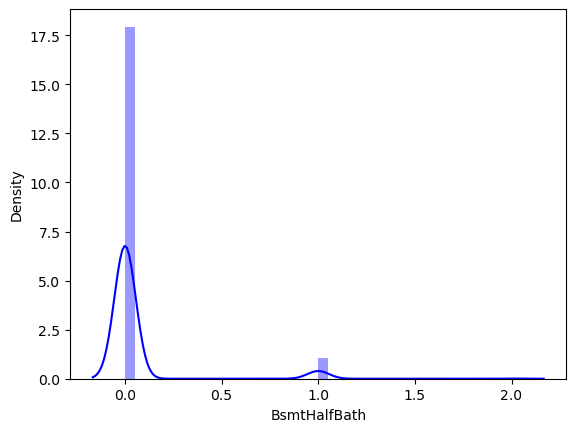

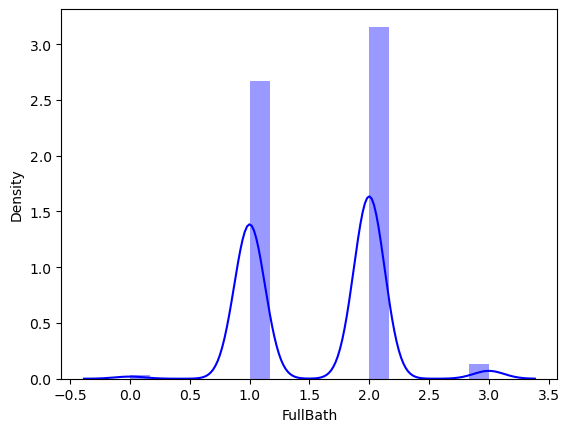

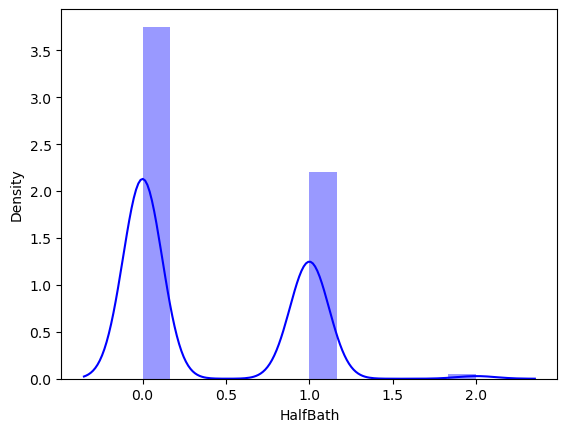

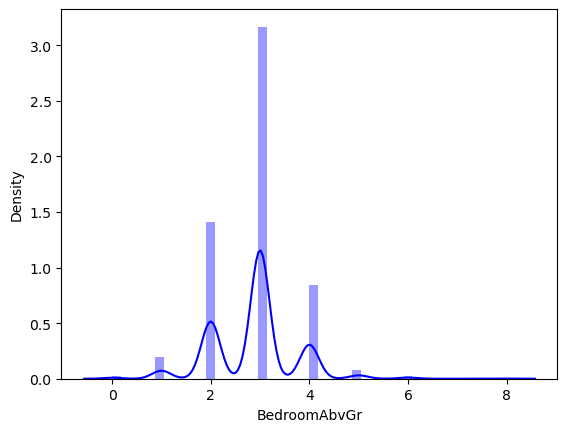

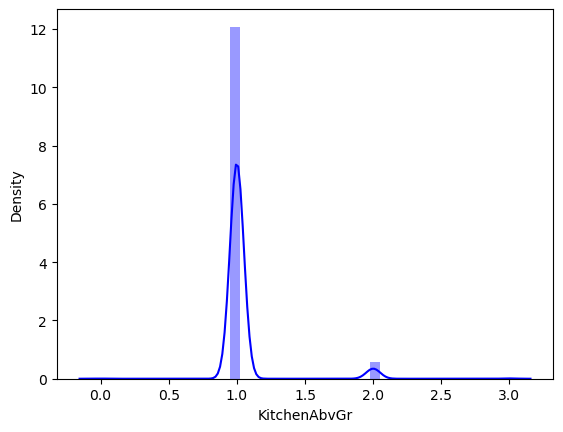

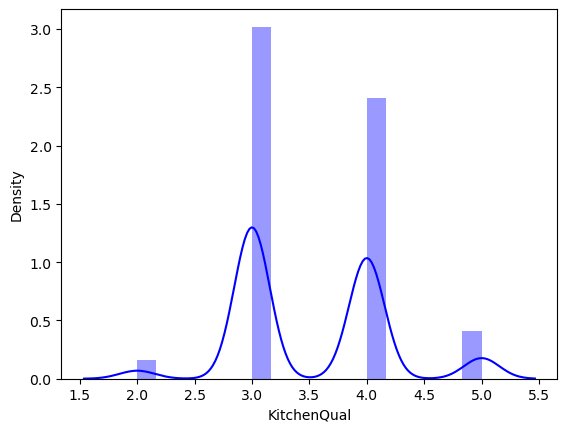

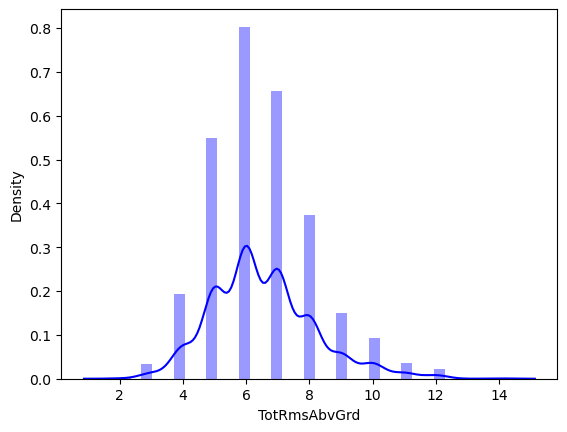

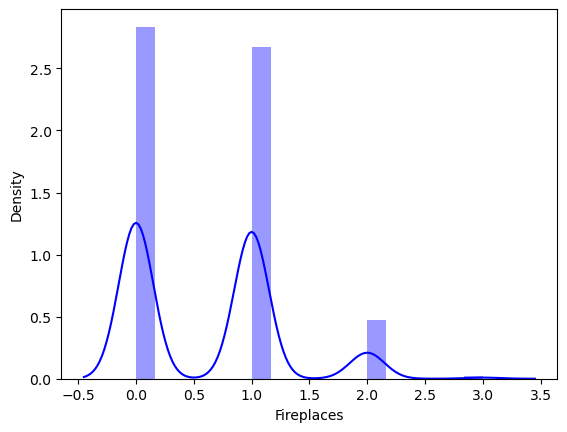

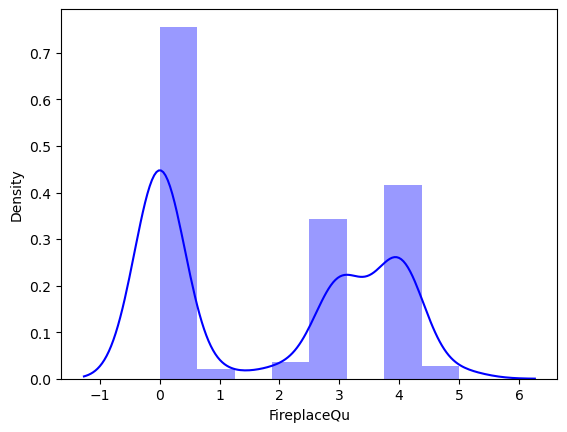

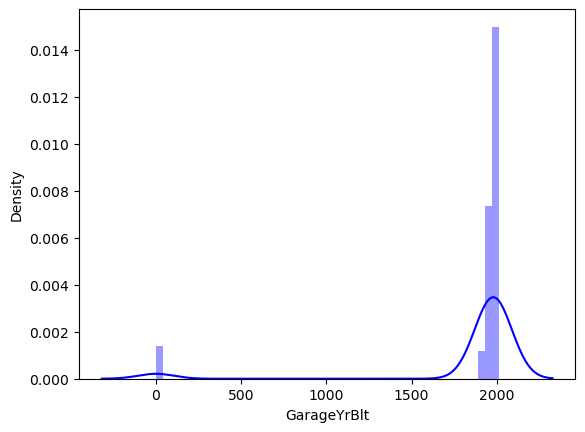

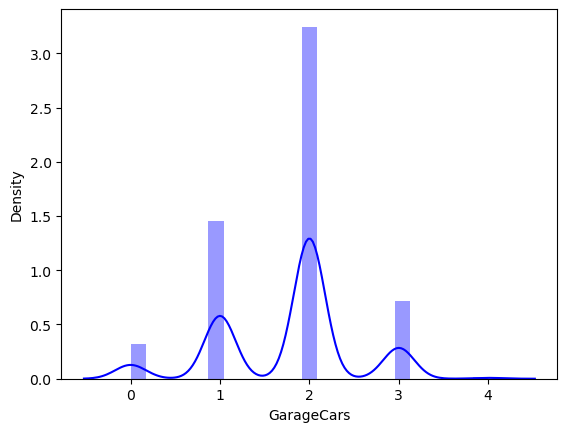

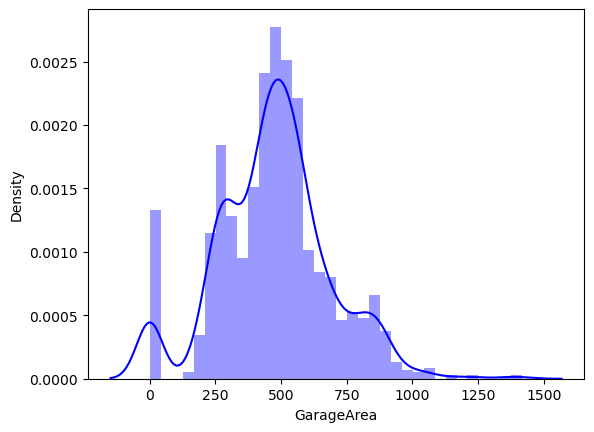

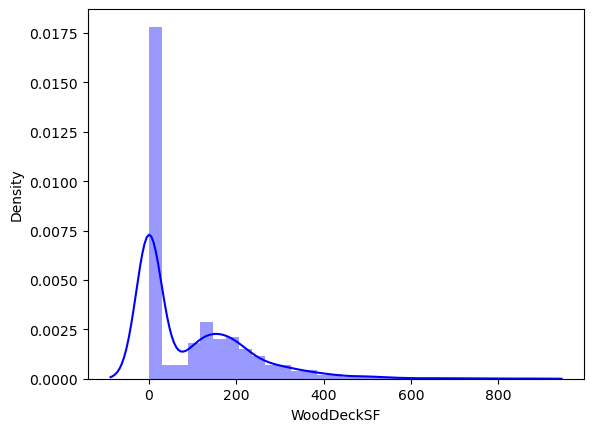

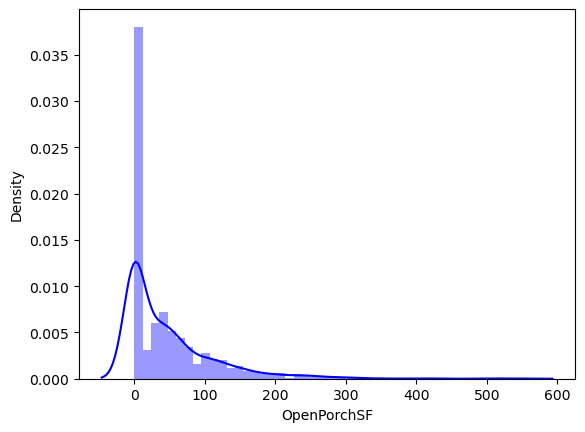

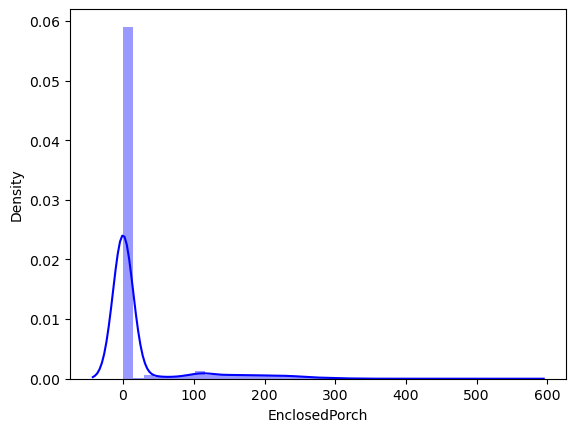

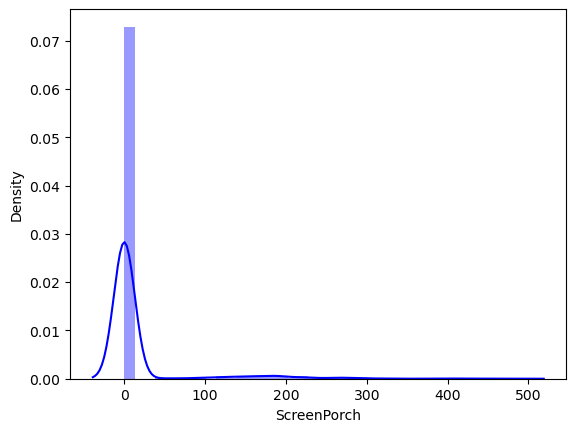

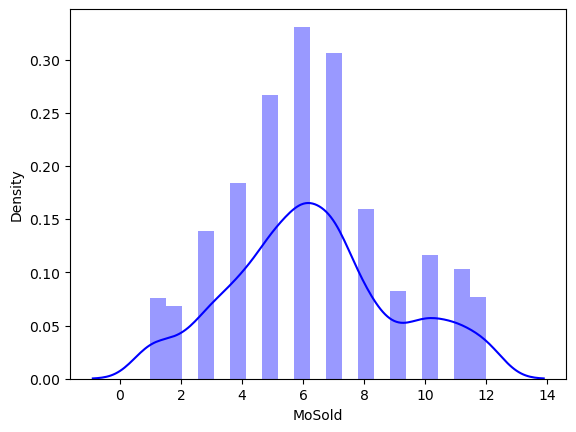

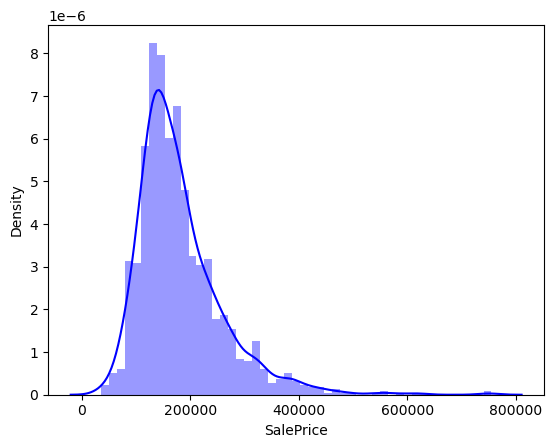

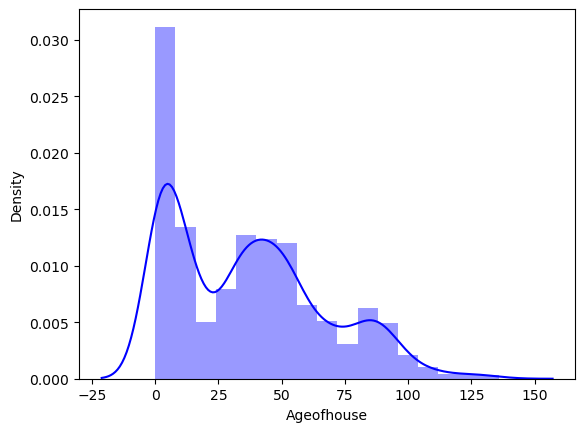

In [228]:
for col in house.columns:
    if house[col].dtypes!=np.object:
        plt.figure()
        sns.distplot(house[col],color='b')
        plt.show()


In [229]:
# IQR to remove the outlier

cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'SalePrice'] 

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [230]:
house.shape

(1356, 72)

Let us check if the target variable's(SalePrice) data

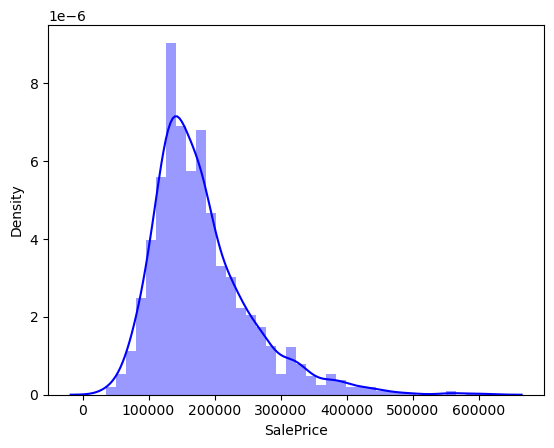

In [231]:
plt.figure()
sns.distplot(house['SalePrice'],color='b')
plt.show()

The data is skewed so we shall transform using log and below is the result.

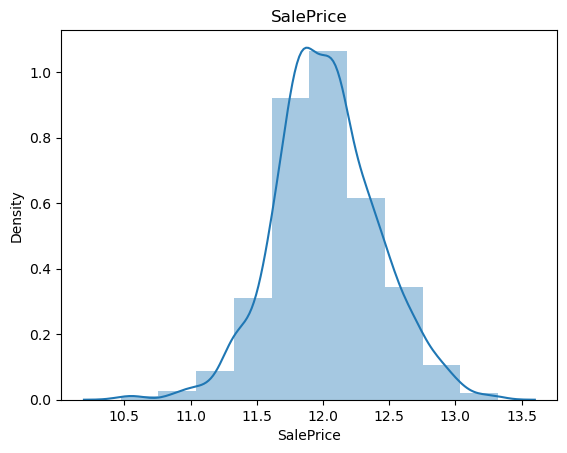

In [232]:
# Visualise the target variable -> SalePrice after transforming the sales price

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

Above we could see the data has been normalised.

In [233]:
# Dropping ID since it does not add any value for our analysis
house = house.drop(['Id'], axis=1)


In [234]:
cont_cols = [column for column in house.columns if house[column].dtypes!=np.object]
cont_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'SalePrice',
 'Ageofhouse']

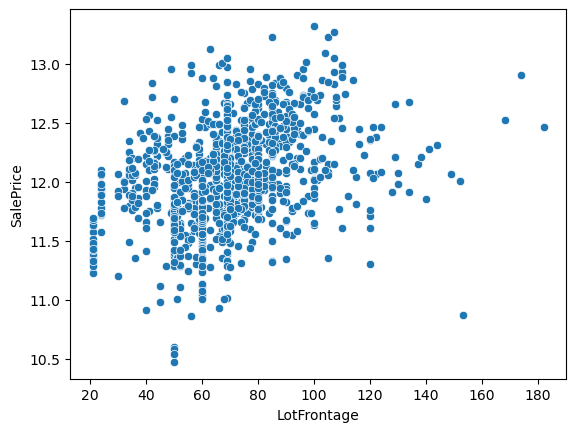

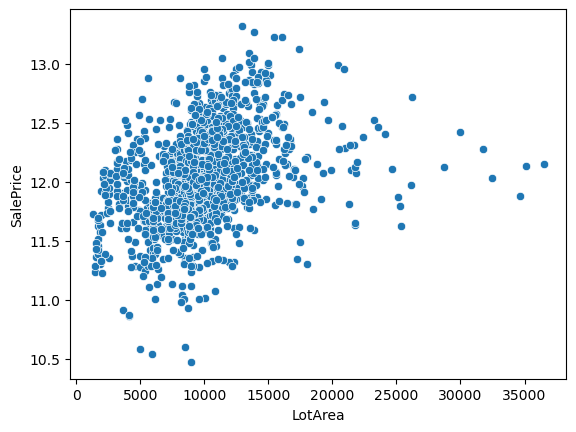

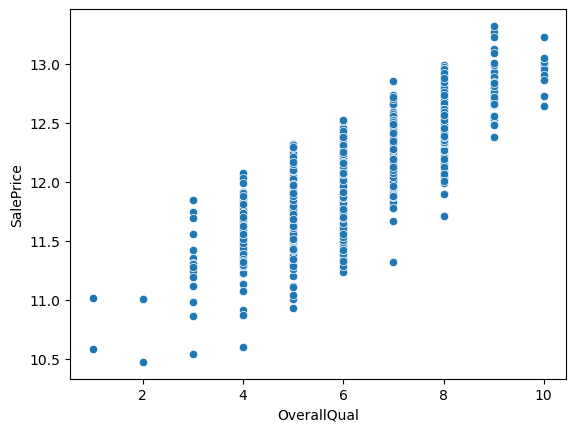

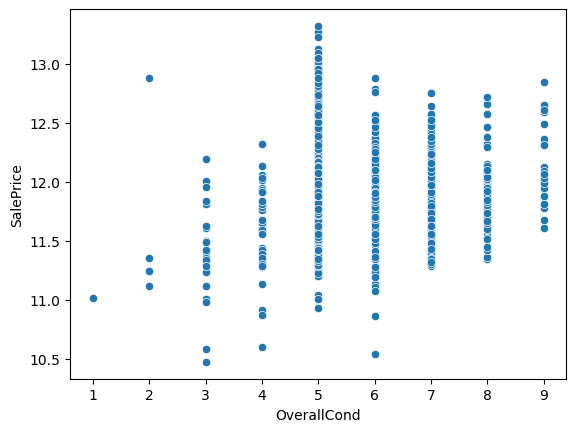

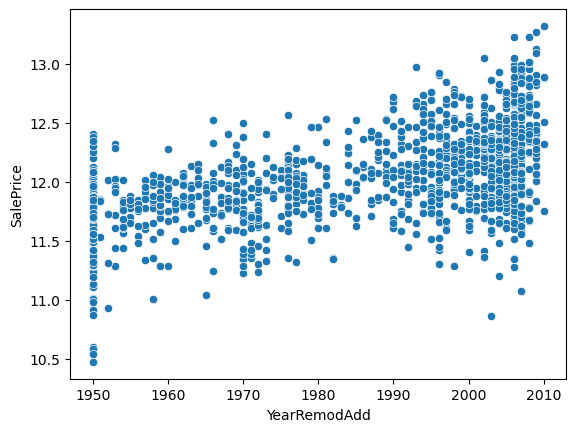

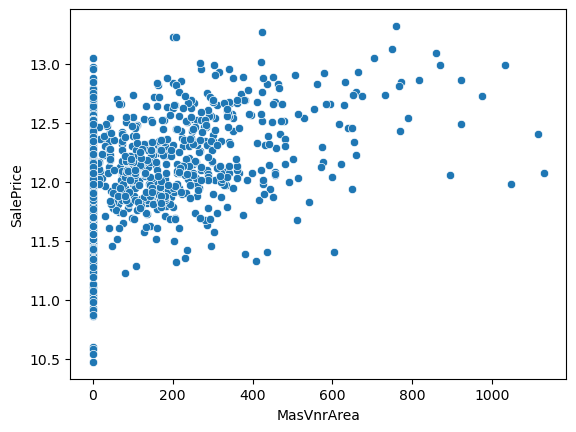

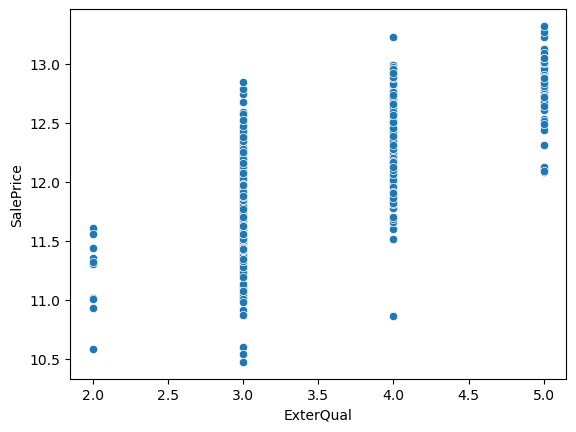

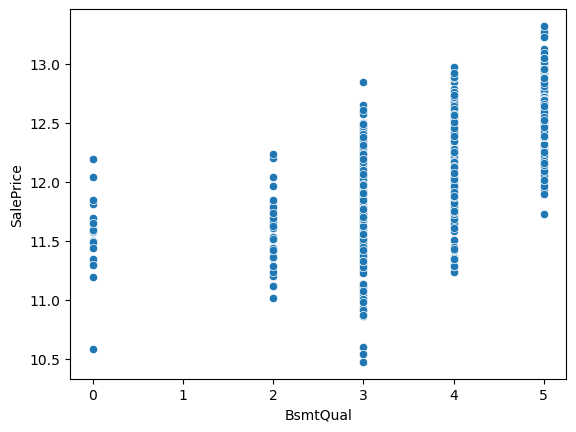

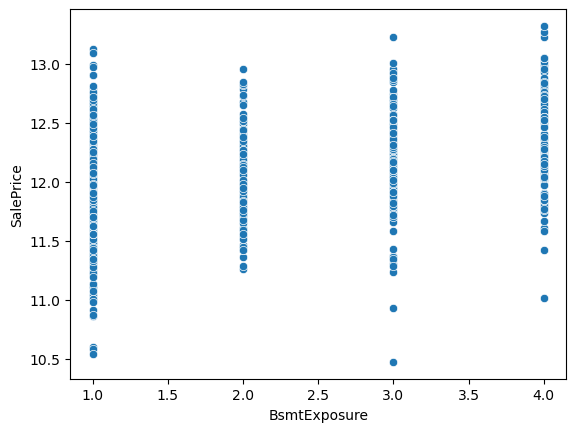

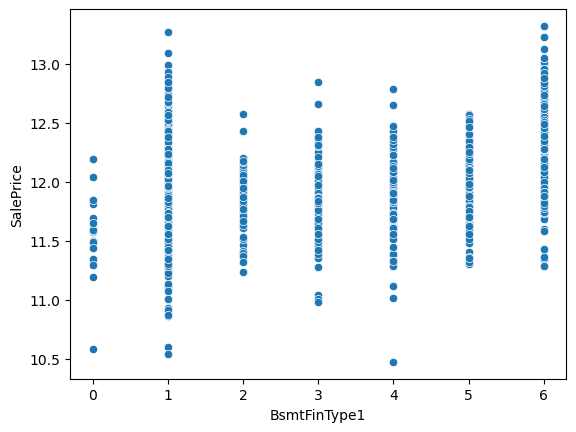

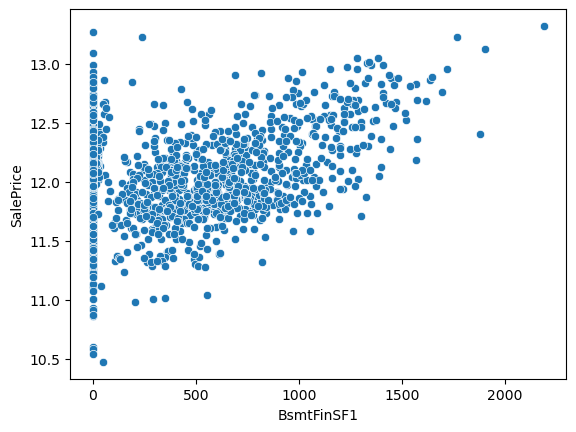

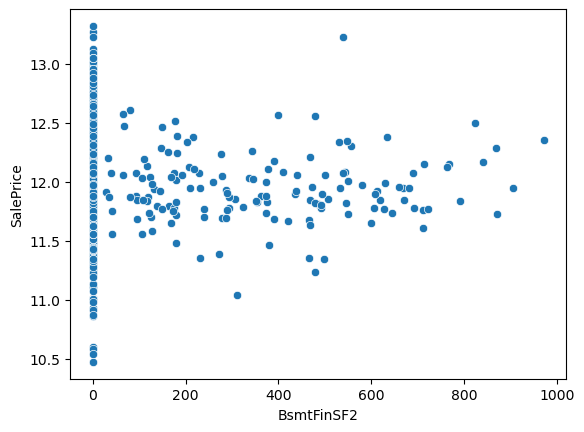

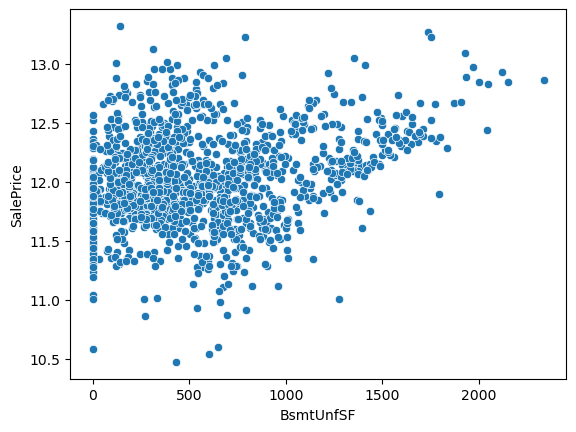

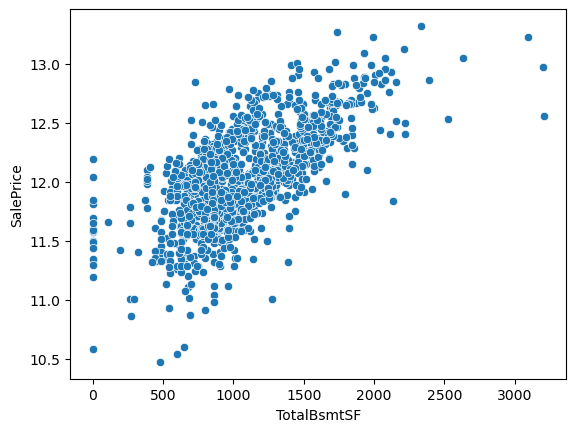

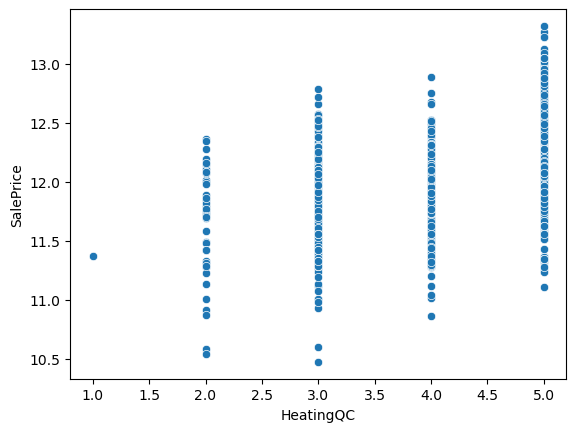

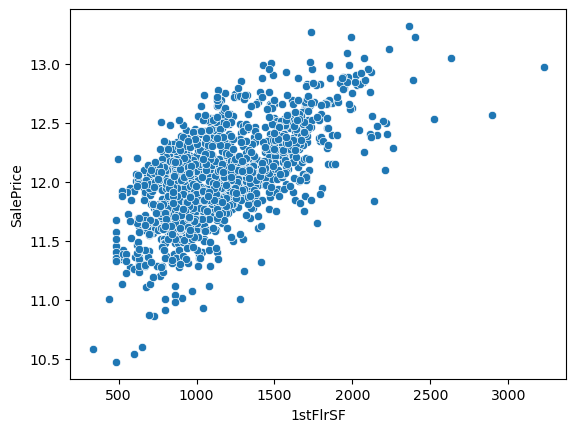

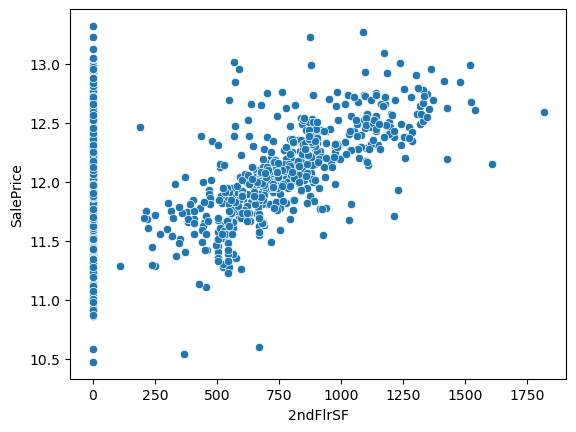

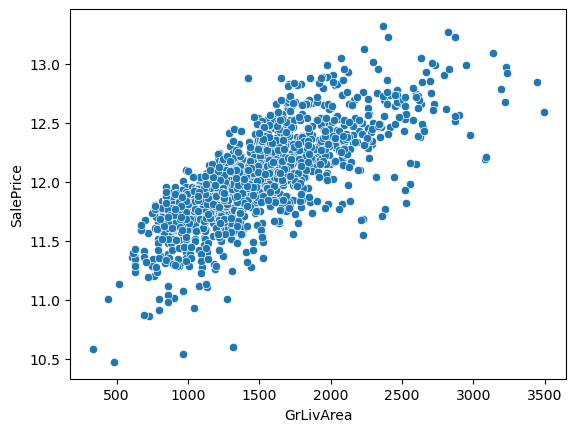

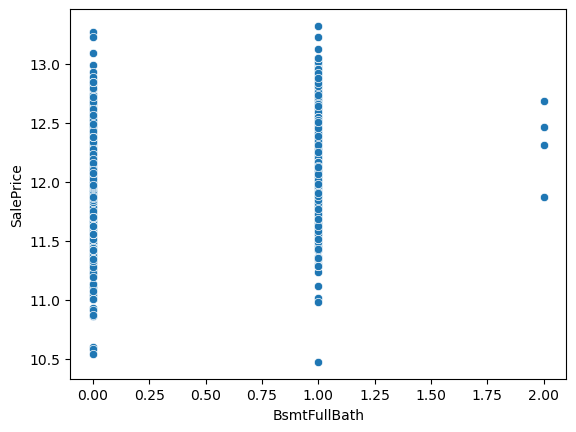

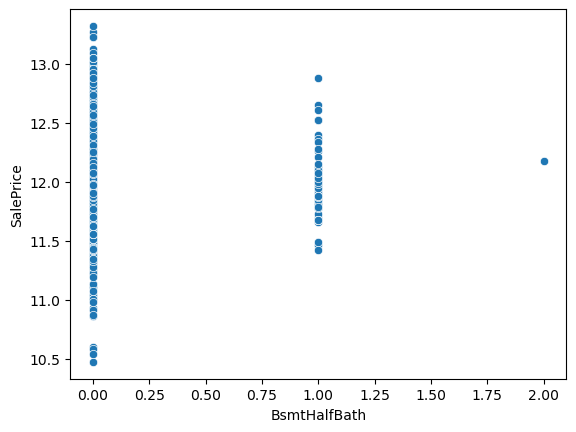

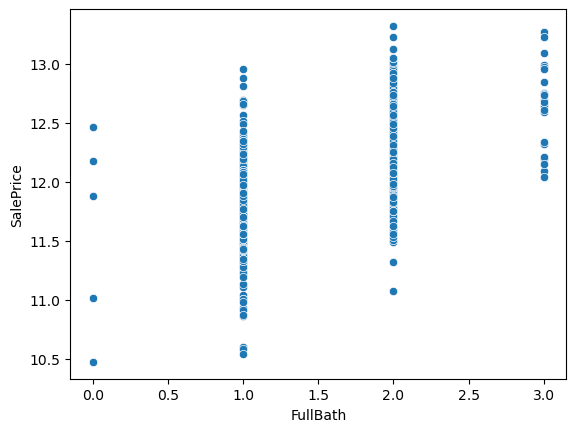

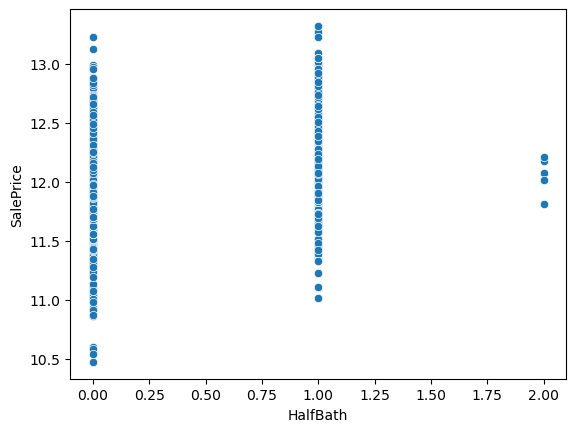

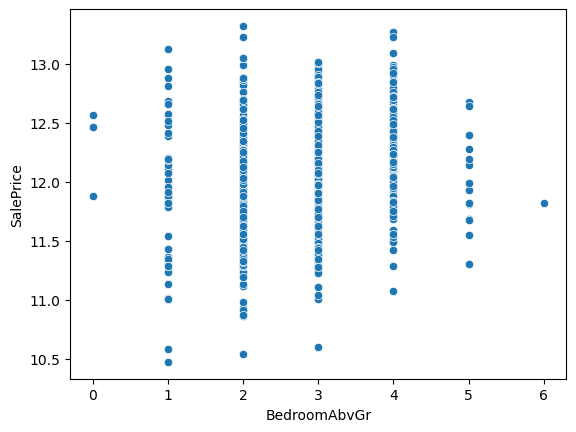

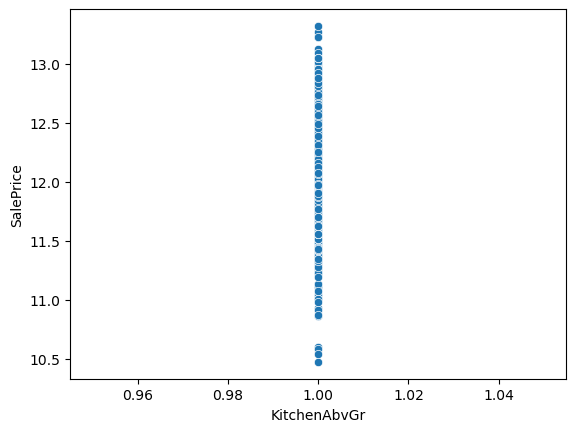

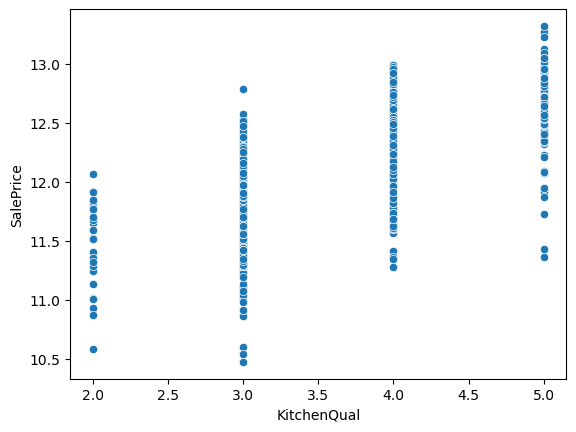

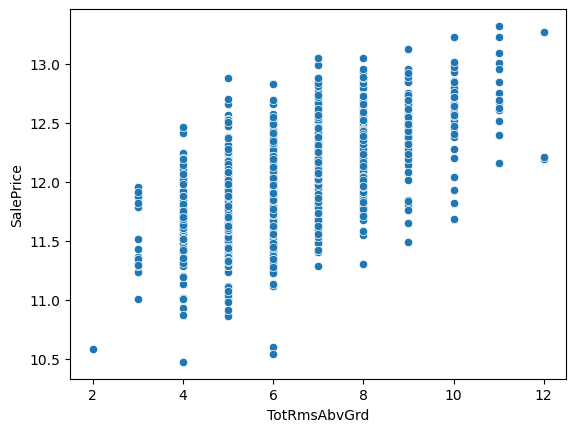

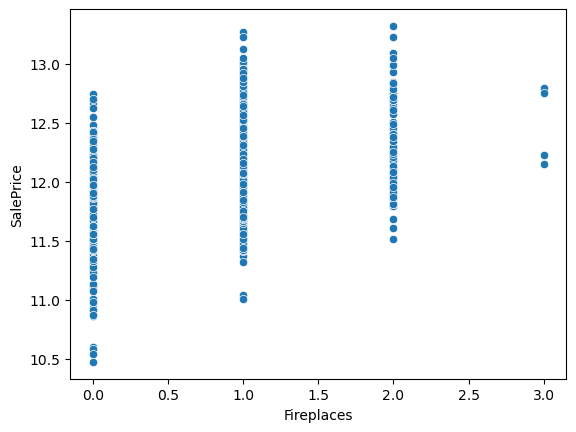

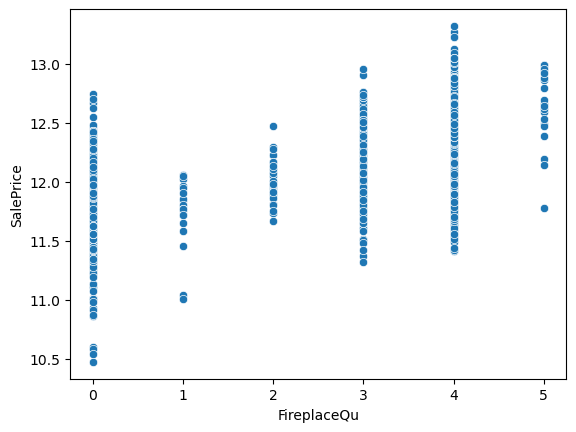

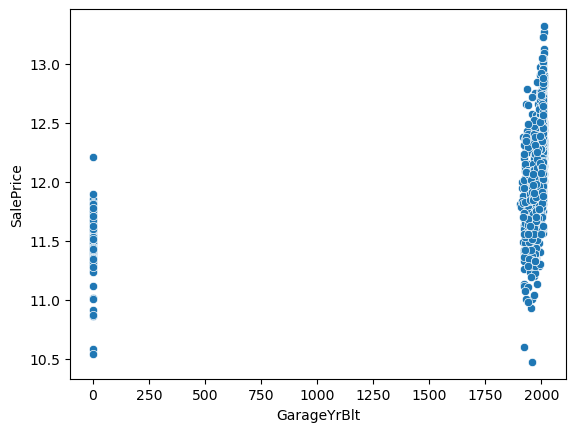

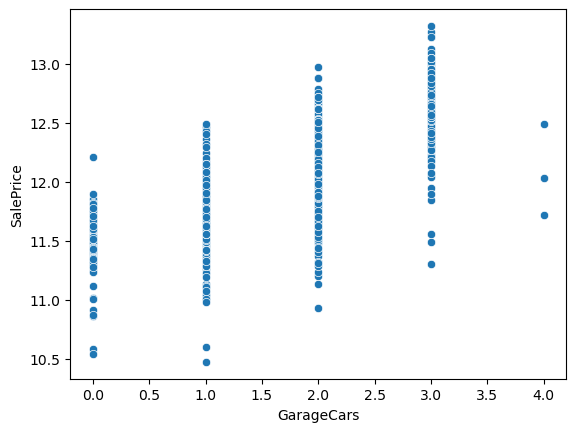

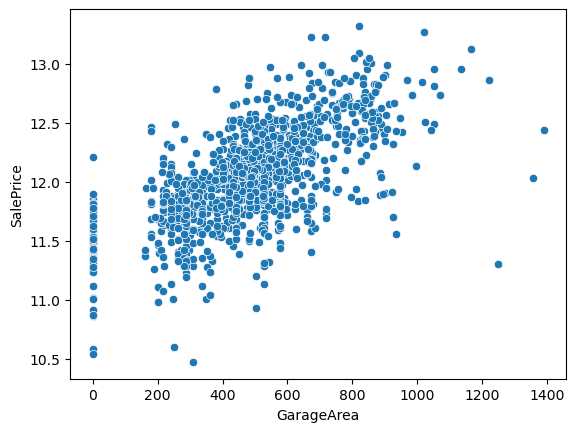

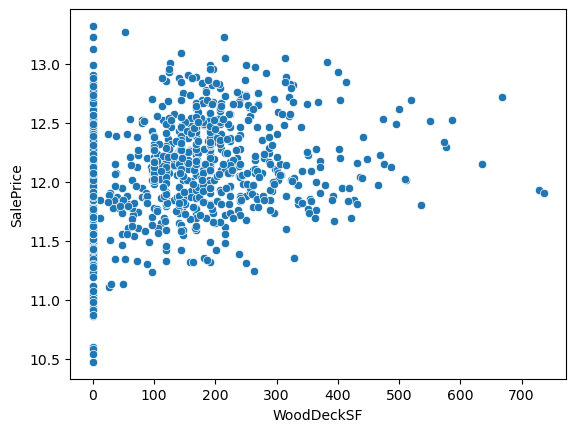

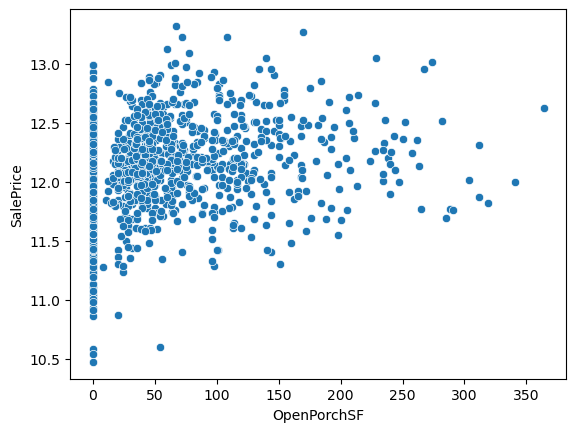

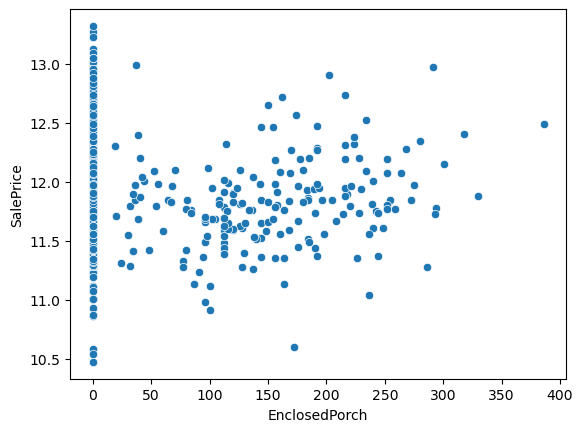

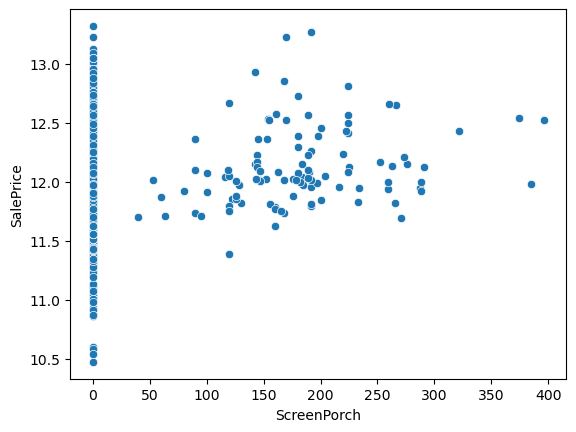

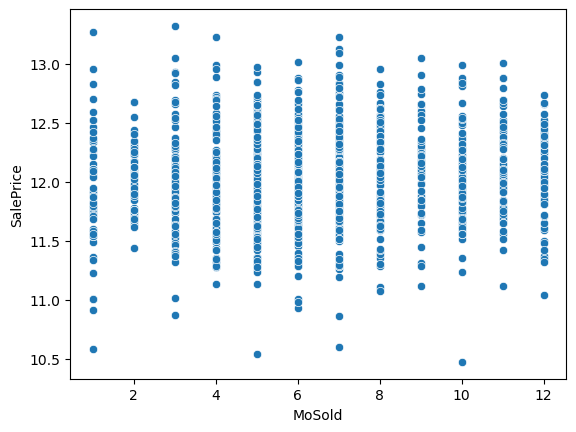

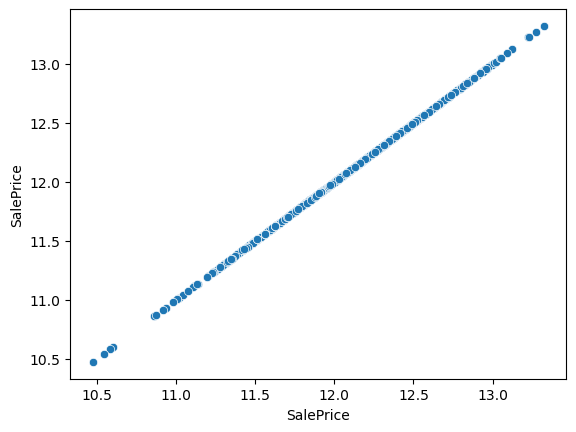

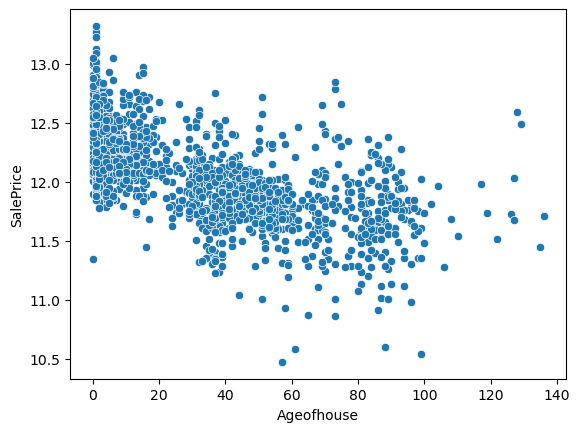

In [235]:
for i in cont_cols:
    sns.scatterplot(x=house[i],y=house["SalePrice"])
    plt.show()

GrLivArea shows the strongest linearity.

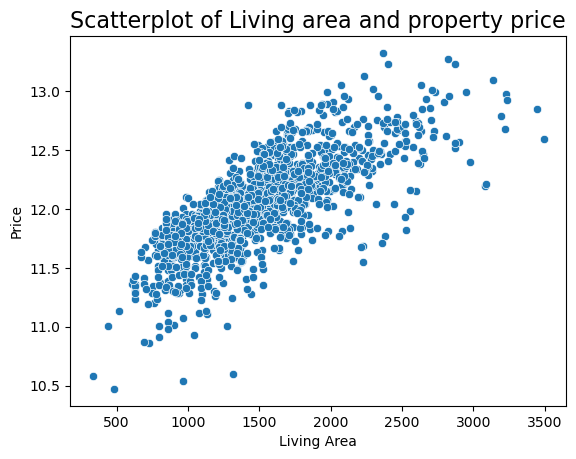

In [236]:
#scatter plot for GrLivArea

sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=house)
plt.title('Scatterplot of Living area and property price', fontsize=16)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

Onething we get to know here is larger the area the prices would be higher

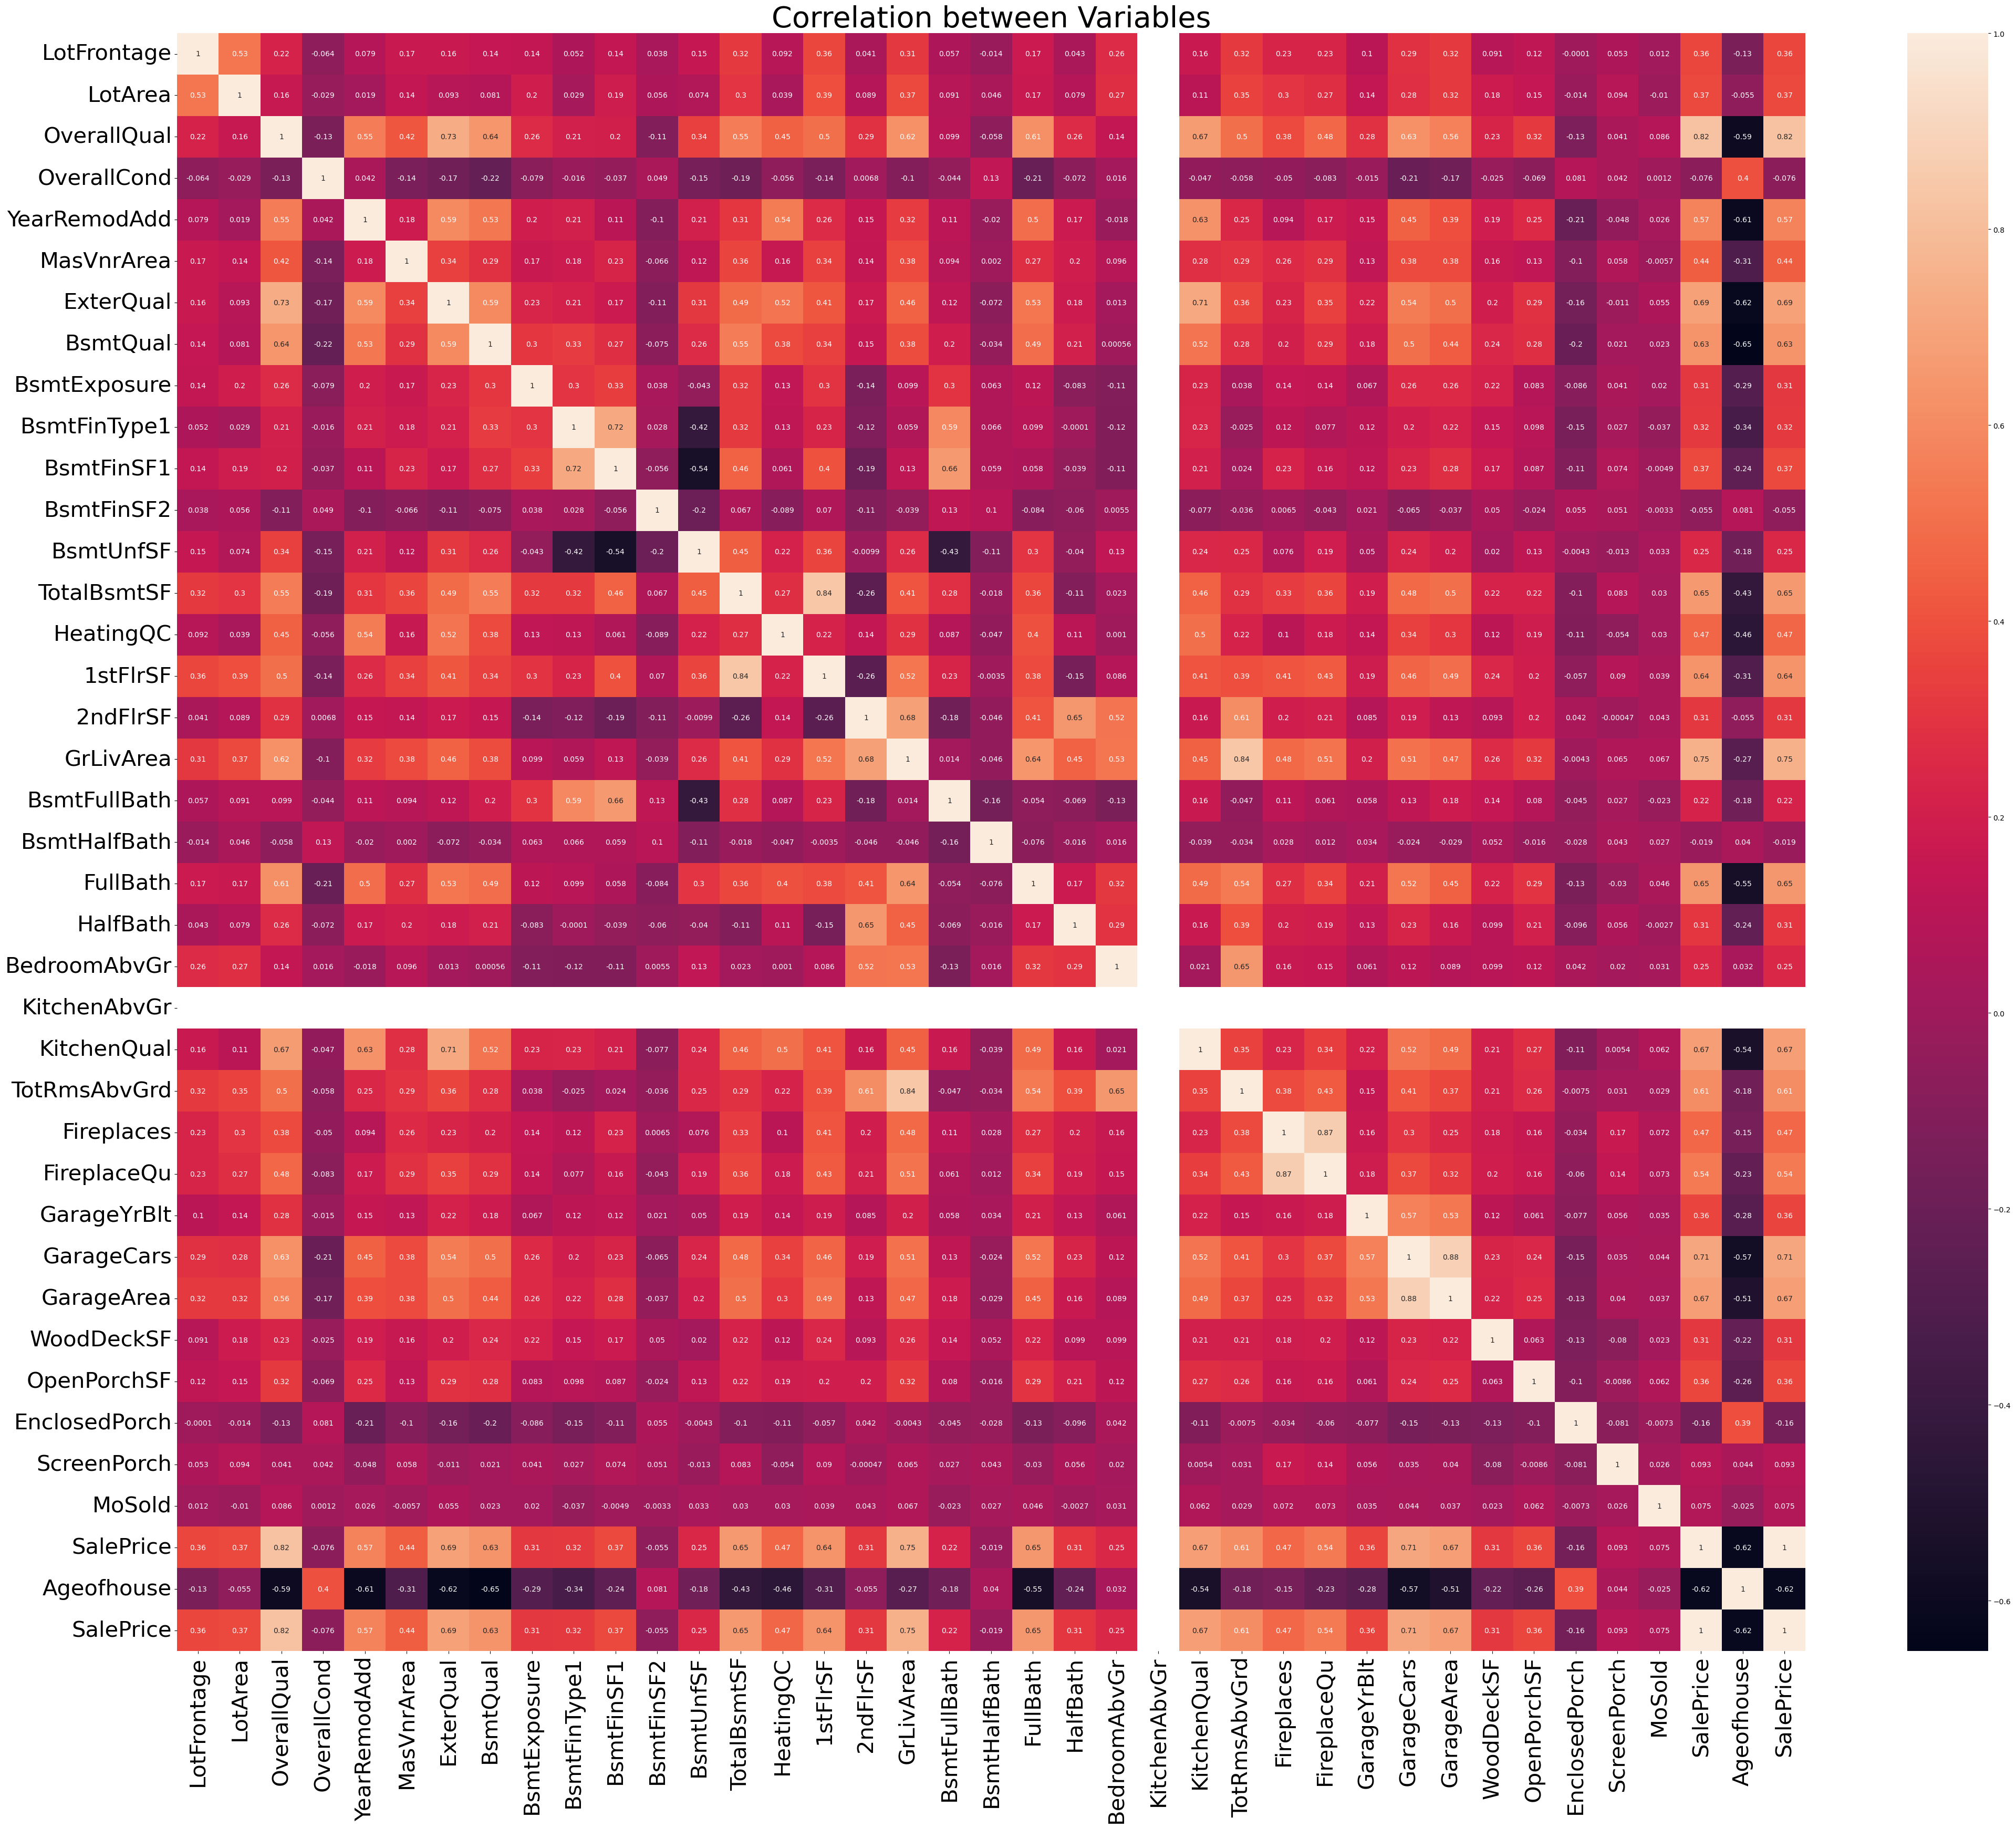

In [237]:
plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

sns.heatmap(house[cont_cols+["SalePrice"]].corr(),annot=True)
plt.title("Correlation between Variables", fontsize=40)
plt.show()

Insights from the heatmap: Correlation of sale price with independent variables:

- Sale price is highly positively correlated with OverallQual, GrLivArea
- Sale price is positively correlated with TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea
- Sale price is not highly negatively correlated with other variables.


Some independent variables are highly correlated with each other. This has to be considered because of multicollinearity that may become an issue in the model

- GarageYrBlt are highly correlated
- TotRmsAbvGrd GrLivArea are highly correlated
- GarageArea GarageCars are highly correlated
- 1stFlrSF TotalBsmtSF are highly correlated


One of the highly correlated variables above is dropped

In [238]:
house.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

## Creating Dummy Variables

In [239]:
cat_cols = [columns for columns in house.columns if house[columns].dtypes == np.object]

In [240]:
house[cat_cols].nunique()

MSSubClass       15
MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        4
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          5
Exterior1st      14
Exterior2nd      16
MasVnrType        4
ExterCond         5
Foundation        6
BsmtCond          5
BsmtFinType2      7
Heating           6
CentralAir        2
Electrical        5
Functional        7
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [241]:
house_new = house.drop(list(house[cat_cols].columns), axis=1)

In [242]:
house_new.shape

(1356, 34)

In [243]:
#Dummies = n-1

dummies = pd.get_dummies(house[cat_cols],drop_first = True)
dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 187 columns]

In [244]:
house_new = pd.concat([house_new, dummies], axis=1)
house_new.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7            5          2003       196.0   
1         80.0     9600            6            8          1976         0.0   
2         68.0    11250            7            5          2002       162.0   
3         60.0     9550            7            5          1970         0.0   
4         84.0    14260            8            5          2000       350.0   

   ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  ...  SaleType_ConLI  \
0          4         4             1             6  ...               0   
1          3         4             4             5  ...               0   
2          4         4             2             6  ...               0   
3          3         3             1             5  ...               0   
4          4         4             3             6  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 221 columns]

## Train-Test Split

In [245]:
# splitting the dataframe into Train and Test

np.random.seed(0)

house_train, house_test = train_test_split(house_new, train_size=0.70, random_state=100)

In [246]:
print(house_train.shape)
print(house_test.shape)

(949, 221)
(407, 221)


## Rescaling the features

In [247]:
#Instantiate an object
scaler = StandardScaler()

In [248]:
# We have already crea# create a list of numeric vars


cont_cols_new = [columns for columns in house.columns if house[columns].dtypes != np.object]
cont_cols_new

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'SalePrice',
 'Ageofhouse']

In [249]:
# Fit on data

house_train[cont_cols_new] = scaler.fit_transform(house_train[cont_cols_new])

In [250]:
house_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
1375     0.995642  0.362294     1.391156    -0.545736      1.028015   
432     -2.249942 -1.936872    -0.826437    -0.545736     -0.711946   
595     -0.002999  0.441121     1.391156    -0.545736      0.979683   
994      1.345167  0.733618     2.869551    -0.545736      1.028015   
775     -1.850486 -1.282937    -0.087239    -0.545736      0.593025   

      MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  ...  \
1375   -0.135025   1.031755  0.582134      2.343168     -1.244875  ...   
432     1.629034  -0.695116 -0.673423     -0.617773      0.669852  ...   
595     0.806601   1.031755  0.582134      2.343168      1.148534  ...   
994     0.758924   2.758626  1.837691      2.343168      1.148534  ...   
775     1.295293  -0.695116  1.837691     -0.617773      1.148534  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1375               0               0             1             0            0   
432                0               0             0             0            1   
595                0               0             1             0            0   
994                0               0             0             0            1   
775                0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1375                      0                     0                     0   
432                       0                     0                     0   
595                       0                     0                     0   
994                       0                     0                     0   
775                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1375                     0                      1  
432                      1                      0  
595                      0                      1  
994                      1                      0  
775                      1                      0  

[5 rows x 221 columns]

In [251]:
house_train.describe()

LotFrontage       LotArea   OverallQual   OverallCond  YearRemodAdd  \
count  9.490000e+02  9.490000e+02  9.490000e+02  9.490000e+02  9.490000e+02   
mean  -3.462866e-16 -9.359098e-19 -2.433366e-16 -1.759510e-16 -2.897577e-15   
std    1.000527e+00  1.000527e+00  1.000527e+00  1.000527e+00  1.000527e+00   
min   -2.399738e+00 -2.045608e+00 -3.783227e+00 -4.062910e+00 -1.726923e+00   
25%   -4.523877e-01 -5.296435e-01 -8.264368e-01 -5.457364e-01 -8.569425e-01   
50%   -2.999081e-03 -4.730283e-02 -8.723932e-02 -5.457364e-01  4.480282e-01   
75%    4.963216e-01  4.669743e-01  6.519581e-01  3.335570e-01  8.830184e-01   
max    5.239868e+00  6.481405e+00  2.869551e+00  2.971437e+00  1.173012e+00   

         MasVnrArea     ExterQual      BsmtQual  BsmtExposure  BsmtFinType1  \
count  9.490000e+02  9.490000e+02  9.490000e+02  9.490000e+02  9.490000e+02   
mean   1.123092e-17  8.984734e-17  9.733462e-17  8.423188e-17 -1.123092e-16   
std    1.000527e+00  1.000527e+00  1.000527e+00  1.000527e+00  1.000527e+00   
min   -6.117976e-01 -2.421986e+00 -4.440094e+00 -6.177728e-01 -1.723557e+00   
25%   -6.117976e-01 -6.951156e-01 -6.734230e-01 -6.177728e-01 -1.244875e+00   
50%   -6.117976e-01 -6.951156e-01  5.821338e-01 -6.177728e-01  1.911701e-01   
75%    3.953847e-01  1.031755e+00  5.821338e-01  3.692076e-01  1.148534e+00   
max    6.033222e+00  2.758626e+00  1.837691e+00  2.343168e+00  1.148534e+00   

       ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count  ...      949.000000      949.000000    949.000000    949.000000   
mean   ...        0.001054        0.005269      0.093783      0.002107   
std    ...        0.032461        0.072433      0.291680      0.045883   
min    ...        0.000000        0.000000      0.000000      0.000000   
25%    ...        0.000000        0.000000      0.000000      0.000000   
50%    ...        0.000000        0.000000      0.000000      0.000000   
75%    ...        0.000000        0.000000      0.000000      0.000000   
max    ...        1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   949.000000             949.000000            949.000000   
mean      0.857745               0.002107              0.003161   
std       0.349496               0.045883              0.056165   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            949.000000            949.000000             949.000000  
mean               0.008430              0.819810               0.094837  
std                0.091475              0.384548               0.293144  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 221 columns]

## Training the Model

In [252]:
#X_train, y_train

y_train = house_train.pop('SalePrice')
X_train = house_train

## Feature Selection

Let us take Top 35 features.

In [253]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=35)
rfe = rfe.fit(X_train, y_train)

rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,

In [254]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 138),
 ('LotArea', False, 113),
 ('OverallQual', False, 33),
 ('OverallCond', False, 62),
 ('YearRemodAdd', False, 154),
 ('MasVnrArea', False, 183),
 ('ExterQual', False, 180),
 ('BsmtQual', False, 184),
 ('BsmtExposure', False, 159),
 ('BsmtFinType1', False, 164),
 ('BsmtFinSF1', False, 11),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 150),
 ('2ndFlrSF', False, 182),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 134),
 ('BsmtHalfBath', False, 186),
 ('FullBath', False, 132),
 ('HalfBath', False, 131),
 ('BedroomAbvGr', False, 181),
 ('KitchenAbvGr', False, 24),
 ('KitchenQual', False, 124),
 ('Fireplaces', False, 160),
 ('FireplaceQu', False, 146),
 ('GarageCars', False, 72),
 ('WoodDeckSF', False, 162),
 ('OpenPorchSF', False, 170),
 ('EnclosedPorch', False, 168),
 ('ScreenPorch', False, 142),
 ('MoSold', False, 177),
 ('Ageofhouse', False, 48),
 ('MSSubClass_30', False, 96),
 ('MSSubClass_40', T

In [255]:
#Building Model

def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [256]:
#Checking VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [257]:
col = X_train.columns[rfe.support_]

In [258]:
col

Index(['TotalBsmtSF', 'GrLivArea', 'MSSubClass_40', 'MSSubClass_75',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandSlope_Sev', 'Neighborhood_Veenker', 'HouseStyle_2.5Unf',
       'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Stone',
       'BsmtCond_Po', 'Heating_Wall', 'Functional_Maj2', 'Functional_Mod',
       'Functional_Sev', 'GarageFinish_NA', 'GarageQual_Fa', 'GarageQual_Po'],
      dtype='object')

In [259]:
X_train_rfe = X_train[col]

## Building a linear model

In [260]:
# Building 1st linear regression model

X_train_1 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     148.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:23   Log-Likelihood:                -455.70
No. Observations:                 949   AIC:                             981.4
Df Residuals:                     914   BIC:                             1151.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5601 

In [261]:
#Calculating VIF for the model

checkVIF(X_train_rfe)

Features     VIF
17    Exterior2nd_CBlock     inf
14    Exterior1st_CBlock     inf
25          ExterCond_TA  132.42
6            MSZoning_RL   89.60
21       MasVnrType_None   58.13
18   Exterior2nd_CmentBd   44.59
15   Exterior1st_CemntBd   44.55
20    MasVnrType_BrkFace   31.11
7            MSZoning_RM   18.20
24          ExterCond_Gd   18.15
22      MasVnrType_Stone   10.52
4            MSZoning_FV    6.18
23          ExterCond_Fa    4.10
3          MSSubClass_75    2.96
10     HouseStyle_2.5Unf    2.81
27           BsmtCond_Po    2.24
5            MSZoning_RH    1.85
0            TotalBsmtSF    1.54
34         GarageQual_Po    1.54
8          LandSlope_Sev    1.54
30        Functional_Mod    1.41
1              GrLivArea    1.41
32       GarageFinish_NA    1.27
28          Heating_Wall    1.25
11     RoofStyle_Gambrel    1.23
29       Functional_Maj2    1.19
16   Exterior2nd_AsphShn    1.16
26      Foundation_Stone    1.16
13   Exterior1st_BrkComm    1.15
12     RoofStyle_Mansard    1.12
31        Functional_Sev    1.12
33         GarageQual_Fa    1.11
9   Neighborhood_Veenker    1.02
2          MSSubClass_40    1.02
19     Exterior2nd_Stone    1.00

Dropping Features one by one where p-value > 0.05 and higher VIF. Here Exterior2nd_Stone has higher VIF and p-value so dropping it.

In [262]:
X_train_new = X_train_rfe.drop(['Exterior2nd_Stone'], axis = 1)

In [263]:
# Building 2nd linear regression model

X_train_2 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     153.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:24   Log-Likelihood:                -456.16
No. Observations:                 949   AIC:                             980.3
Df Residuals:                     915   BIC:                             1145.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5602 

In [264]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
17    Exterior2nd_CBlock     inf
14    Exterior1st_CBlock     inf
24          ExterCond_TA  132.42
6            MSZoning_RL   89.60
20       MasVnrType_None   58.13
18   Exterior2nd_CmentBd   44.59
15   Exterior1st_CemntBd   44.55
19    MasVnrType_BrkFace   31.11
7            MSZoning_RM   18.20
23          ExterCond_Gd   18.15
21      MasVnrType_Stone   10.52
4            MSZoning_FV    6.18
22          ExterCond_Fa    4.10
3          MSSubClass_75    2.96
10     HouseStyle_2.5Unf    2.81
26           BsmtCond_Po    2.24
5            MSZoning_RH    1.85
0            TotalBsmtSF    1.54
8          LandSlope_Sev    1.54
33         GarageQual_Po    1.54
1              GrLivArea    1.41
29        Functional_Mod    1.41
31       GarageFinish_NA    1.27
27          Heating_Wall    1.25
11     RoofStyle_Gambrel    1.23
28       Functional_Maj2    1.19
16   Exterior2nd_AsphShn    1.16
25      Foundation_Stone    1.16
13   Exterior1st_BrkComm    1.15
12     RoofStyle_Mansard    1.12
30        Functional_Sev    1.12
32         GarageQual_Fa    1.11
9   Neighborhood_Veenker    1.02
2          MSSubClass_40    1.02

BsmtCond_Po has high p-value so dropping it.

In [265]:
X_train_new = X_train_new.drop(['BsmtCond_Po'], axis = 1)

In [266]:
# Building 3rd linear regression model

X_train_3 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     158.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:24   Log-Likelihood:                -456.60
No. Observations:                 949   AIC:                             979.2
Df Residuals:                     916   BIC:                             1139.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5622 

In [267]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
17    Exterior2nd_CBlock     inf
14    Exterior1st_CBlock     inf
24          ExterCond_TA  132.31
6            MSZoning_RL   89.49
20       MasVnrType_None   58.13
18   Exterior2nd_CmentBd   44.59
15   Exterior1st_CemntBd   44.55
19    MasVnrType_BrkFace   31.10
7            MSZoning_RM   18.18
23          ExterCond_Gd   18.14
21      MasVnrType_Stone   10.52
4            MSZoning_FV    6.17
22          ExterCond_Fa    4.05
3          MSSubClass_75    2.96
10     HouseStyle_2.5Unf    2.81
5            MSZoning_RH    1.85
0            TotalBsmtSF    1.54
1              GrLivArea    1.41
28        Functional_Mod    1.41
30       GarageFinish_NA    1.27
26          Heating_Wall    1.25
11     RoofStyle_Gambrel    1.23
25      Foundation_Stone    1.16
16   Exterior2nd_AsphShn    1.16
13   Exterior1st_BrkComm    1.15
32         GarageQual_Po    1.14
12     RoofStyle_Mansard    1.12
27       Functional_Maj2    1.12
29        Functional_Sev    1.12
31         GarageQual_Fa    1.11
8          LandSlope_Sev    1.03
9   Neighborhood_Veenker    1.02
2          MSSubClass_40    1.02

GarageQual_Po has high p-value so dropping it.

In [268]:
X_train_new = X_train_new.drop(['GarageQual_Po'], axis = 1)

In [269]:
# Building 4th linear regression model

X_train_4 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     163.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:24   Log-Likelihood:                -457.17
No. Observations:                 949   AIC:                             978.3
Df Residuals:                     917   BIC:                             1134.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5620 

In [270]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
17    Exterior2nd_CBlock     inf
14    Exterior1st_CBlock     inf
24          ExterCond_TA  132.23
6            MSZoning_RL   89.42
20       MasVnrType_None   58.12
18   Exterior2nd_CmentBd   44.59
15   Exterior1st_CemntBd   44.55
19    MasVnrType_BrkFace   31.10
7            MSZoning_RM   18.16
23          ExterCond_Gd   18.13
21      MasVnrType_Stone   10.52
4            MSZoning_FV    6.16
22          ExterCond_Fa    4.04
3          MSSubClass_75    2.96
10     HouseStyle_2.5Unf    2.81
5            MSZoning_RH    1.85
0            TotalBsmtSF    1.54
1              GrLivArea    1.41
28        Functional_Mod    1.41
30       GarageFinish_NA    1.26
26          Heating_Wall    1.25
11     RoofStyle_Gambrel    1.23
25      Foundation_Stone    1.16
16   Exterior2nd_AsphShn    1.16
13   Exterior1st_BrkComm    1.15
12     RoofStyle_Mansard    1.12
29        Functional_Sev    1.12
31         GarageQual_Fa    1.11
8          LandSlope_Sev    1.03
9   Neighborhood_Veenker    1.02
27       Functional_Maj2    1.02
2          MSSubClass_40    1.02

Exterior1st_CemntBd has high p-value so dropping it.

In [271]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'], axis = 1)

In [272]:
# Building 5th linear regression model

X_train_5 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:24   Log-Likelihood:                -458.13
No. Observations:                 949   AIC:                             978.3
Df Residuals:                     918   BIC:                             1129.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5583 

In [273]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
14    Exterior1st_CBlock     inf
16    Exterior2nd_CBlock     inf
23          ExterCond_TA  132.23
6            MSZoning_RL   89.42
19       MasVnrType_None   58.12
18    MasVnrType_BrkFace   31.10
7            MSZoning_RM   18.16
22          ExterCond_Gd   18.13
20      MasVnrType_Stone   10.52
4            MSZoning_FV    6.16
21          ExterCond_Fa    4.04
3          MSSubClass_75    2.96
10     HouseStyle_2.5Unf    2.81
5            MSZoning_RH    1.85
0            TotalBsmtSF    1.53
1              GrLivArea    1.41
27        Functional_Mod    1.41
29       GarageFinish_NA    1.26
25          Heating_Wall    1.25
11     RoofStyle_Gambrel    1.23
17   Exterior2nd_CmentBd    1.17
24      Foundation_Stone    1.16
15   Exterior2nd_AsphShn    1.16
13   Exterior1st_BrkComm    1.15
12     RoofStyle_Mansard    1.12
28        Functional_Sev    1.12
30         GarageQual_Fa    1.11
8          LandSlope_Sev    1.03
9   Neighborhood_Veenker    1.02
26       Functional_Maj2    1.02
2          MSSubClass_40    1.02

RoofStyle_Mansard has high p-value so dropping it.

In [274]:
X_train_new = X_train_new.drop(['RoofStyle_Mansard'], axis = 1)

In [275]:
# Building 6th linear regression model

X_train_6 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     174.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:25   Log-Likelihood:                -459.13
No. Observations:                 949   AIC:                             978.3
Df Residuals:                     919   BIC:                             1124.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5432 

In [276]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
15    Exterior2nd_CBlock     inf
13    Exterior1st_CBlock     inf
22          ExterCond_TA  132.08
6            MSZoning_RL   89.16
18       MasVnrType_None   58.10
17    MasVnrType_BrkFace   31.10
21          ExterCond_Gd   18.12
7            MSZoning_RM   18.07
19      MasVnrType_Stone   10.51
4            MSZoning_FV    6.15
20          ExterCond_Fa    4.04
3          MSSubClass_75    2.96
10     HouseStyle_2.5Unf    2.81
5            MSZoning_RH    1.85
0            TotalBsmtSF    1.53
26        Functional_Mod    1.41
1              GrLivArea    1.40
28       GarageFinish_NA    1.26
24          Heating_Wall    1.25
11     RoofStyle_Gambrel    1.23
16   Exterior2nd_CmentBd    1.16
14   Exterior2nd_AsphShn    1.16
12   Exterior1st_BrkComm    1.15
27        Functional_Sev    1.12
29         GarageQual_Fa    1.11
23      Foundation_Stone    1.06
8          LandSlope_Sev    1.03
9   Neighborhood_Veenker    1.02
2          MSSubClass_40    1.02
25       Functional_Maj2    1.02

Foundation_Stone has high p-value so dropping it.

In [277]:
X_train_new = X_train_new.drop(['Foundation_Stone'], axis = 1)

In [278]:
# Building 7th linear regression model

X_train_7 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:25   Log-Likelihood:                -459.91
No. Observations:                 949   AIC:                             977.8
Df Residuals:                     920   BIC:                             1119.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4950 

In [279]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
15    Exterior2nd_CBlock     inf
13    Exterior1st_CBlock     inf
22          ExterCond_TA  130.03
6            MSZoning_RL   85.75
18       MasVnrType_None   57.87
17    MasVnrType_BrkFace   31.03
21          ExterCond_Gd   17.82
7            MSZoning_RM   17.49
19      MasVnrType_Stone   10.50
4            MSZoning_FV    5.94
20          ExterCond_Fa    4.00
3          MSSubClass_75    2.95
10     HouseStyle_2.5Unf    2.81
5            MSZoning_RH    1.82
0            TotalBsmtSF    1.53
25        Functional_Mod    1.41
1              GrLivArea    1.39
27       GarageFinish_NA    1.26
23          Heating_Wall    1.25
11     RoofStyle_Gambrel    1.23
14   Exterior2nd_AsphShn    1.16
16   Exterior2nd_CmentBd    1.16
12   Exterior1st_BrkComm    1.15
26        Functional_Sev    1.12
28         GarageQual_Fa    1.11
8          LandSlope_Sev    1.03
9   Neighborhood_Veenker    1.02
24       Functional_Maj2    1.02
2          MSSubClass_40    1.02

MSSubClass_40 has high p-value so dropping it.

In [280]:
X_train_new = X_train_new.drop(['MSSubClass_40'], axis = 1)

In [281]:
# Building 8th linear regression model

X_train_8 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:25   Log-Likelihood:                -461.24
No. Observations:                 949   AIC:                             978.5
Df Residuals:                     921   BIC:                             1114.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4945 

In [282]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
14    Exterior2nd_CBlock     inf
12    Exterior1st_CBlock     inf
21          ExterCond_TA  130.03
5            MSZoning_RL   85.75
17       MasVnrType_None   57.87
16    MasVnrType_BrkFace   31.03
20          ExterCond_Gd   17.82
6            MSZoning_RM   17.47
18      MasVnrType_Stone   10.50
3            MSZoning_FV    5.94
19          ExterCond_Fa    4.00
2          MSSubClass_75    2.95
9      HouseStyle_2.5Unf    2.81
4            MSZoning_RH    1.82
0            TotalBsmtSF    1.53
24        Functional_Mod    1.41
1              GrLivArea    1.39
26       GarageFinish_NA    1.26
22          Heating_Wall    1.25
10     RoofStyle_Gambrel    1.23
15   Exterior2nd_CmentBd    1.16
13   Exterior2nd_AsphShn    1.16
11   Exterior1st_BrkComm    1.15
25        Functional_Sev    1.12
27         GarageQual_Fa    1.10
7          LandSlope_Sev    1.03
8   Neighborhood_Veenker    1.02
23       Functional_Maj2    1.02

Exterior2nd_AsphShn has high p-value so dropping it.

In [283]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'], axis = 1)

In [284]:
# Building 9th linear regression model

X_train_9 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:26   Log-Likelihood:                -462.57
No. Observations:                 949   AIC:                             979.1
Df Residuals:                     922   BIC:                             1110.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5438 

In [285]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
13    Exterior2nd_CBlock     inf
12    Exterior1st_CBlock     inf
20          ExterCond_TA  129.90
5            MSZoning_RL   85.75
16       MasVnrType_None   57.73
15    MasVnrType_BrkFace   31.00
19          ExterCond_Gd   17.80
6            MSZoning_RM   17.47
17      MasVnrType_Stone   10.48
3            MSZoning_FV    5.94
18          ExterCond_Fa    4.00
2          MSSubClass_75    2.95
9      HouseStyle_2.5Unf    2.81
4            MSZoning_RH    1.82
0            TotalBsmtSF    1.52
23        Functional_Mod    1.41
1              GrLivArea    1.38
25       GarageFinish_NA    1.26
21          Heating_Wall    1.25
14   Exterior2nd_CmentBd    1.16
11   Exterior1st_BrkComm    1.15
24        Functional_Sev    1.12
26         GarageQual_Fa    1.10
10     RoofStyle_Gambrel    1.07
7          LandSlope_Sev    1.03
8   Neighborhood_Veenker    1.02
22       Functional_Maj2    1.02

Heating_Wall has high p-value so dropping it.

In [286]:
X_train_new = X_train_new.drop(['Heating_Wall'], axis = 1)

In [287]:
# Building 10th linear regression model

X_train_10 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     200.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:26   Log-Likelihood:                -463.84
No. Observations:                 949   AIC:                             979.7
Df Residuals:                     923   BIC:                             1106.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5943 

In [288]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
13    Exterior2nd_CBlock     inf
12    Exterior1st_CBlock     inf
20          ExterCond_TA  129.05
5            MSZoning_RL   85.55
16       MasVnrType_None   57.59
15    MasVnrType_BrkFace   30.93
19          ExterCond_Gd   17.70
6            MSZoning_RM   17.42
17      MasVnrType_Stone   10.47
3            MSZoning_FV    5.92
18          ExterCond_Fa    3.99
2          MSSubClass_75    2.95
9      HouseStyle_2.5Unf    2.81
4            MSZoning_RH    1.81
0            TotalBsmtSF    1.50
1              GrLivArea    1.38
24       GarageFinish_NA    1.26
14   Exterior2nd_CmentBd    1.16
22        Functional_Mod    1.14
11   Exterior1st_BrkComm    1.12
23        Functional_Sev    1.12
25         GarageQual_Fa    1.10
10     RoofStyle_Gambrel    1.07
7          LandSlope_Sev    1.03
8   Neighborhood_Veenker    1.02
21       Functional_Maj2    1.02

RoofStyle_Gambrel has high p-value so dropping it.

In [289]:
X_train_new = X_train_new.drop(['RoofStyle_Gambrel'], axis = 1)

In [290]:
# Building 11th linear regression model

X_train_11 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:26   Log-Likelihood:                -465.17
No. Observations:                 949   AIC:                             980.3
Df Residuals:                     924   BIC:                             1102.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7094 

In [291]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
12    Exterior2nd_CBlock     inf
11    Exterior1st_CBlock     inf
19          ExterCond_TA  128.17
5            MSZoning_RL   85.55
15       MasVnrType_None   56.82
14    MasVnrType_BrkFace   30.58
18          ExterCond_Gd   17.59
6            MSZoning_RM   17.42
16      MasVnrType_Stone   10.36
3            MSZoning_FV    5.92
17          ExterCond_Fa    3.99
2          MSSubClass_75    2.95
9      HouseStyle_2.5Unf    2.81
4            MSZoning_RH    1.80
0            TotalBsmtSF    1.49
1              GrLivArea    1.38
23       GarageFinish_NA    1.26
13   Exterior2nd_CmentBd    1.16
21        Functional_Mod    1.14
10   Exterior1st_BrkComm    1.12
22        Functional_Sev    1.12
24         GarageQual_Fa    1.10
7          LandSlope_Sev    1.03
8   Neighborhood_Veenker    1.02
20       Functional_Maj2    1.02

Exterior2nd_CmentBd has high p-value so dropping it.

In [292]:
X_train_new = X_train_new.drop(['Exterior2nd_CmentBd'], axis = 1)

In [293]:
# Building 12th linear regression model

X_train_12 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:27   Log-Likelihood:                -467.02
No. Observations:                 949   AIC:                             982.0
Df Residuals:                     925   BIC:                             1099.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7216 

In [294]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
12    Exterior2nd_CBlock     inf
11    Exterior1st_CBlock     inf
18          ExterCond_TA  128.13
5            MSZoning_RL   85.52
14       MasVnrType_None   56.82
13    MasVnrType_BrkFace   30.58
17          ExterCond_Gd   17.58
6            MSZoning_RM   17.39
15      MasVnrType_Stone   10.34
3            MSZoning_FV    5.92
16          ExterCond_Fa    3.99
2          MSSubClass_75    2.95
9      HouseStyle_2.5Unf    2.80
4            MSZoning_RH    1.80
0            TotalBsmtSF    1.48
1              GrLivArea    1.38
22       GarageFinish_NA    1.24
20        Functional_Mod    1.14
10   Exterior1st_BrkComm    1.12
21        Functional_Sev    1.12
23         GarageQual_Fa    1.10
7          LandSlope_Sev    1.03
8   Neighborhood_Veenker    1.02
19       Functional_Maj2    1.02

Exterior2nd_CBlock has high VIF so dropping it.

In [295]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'], axis=1)

In [296]:
# Building 13th linear regression model

X_train_13 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:27   Log-Likelihood:                -467.02
No. Observations:                 949   AIC:                             982.0
Df Residuals:                     925   BIC:                             1099.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7216 

In [297]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features     VIF
17          ExterCond_TA  128.13
5            MSZoning_RL   85.52
13       MasVnrType_None   56.82
12    MasVnrType_BrkFace   30.58
16          ExterCond_Gd   17.58
6            MSZoning_RM   17.39
14      MasVnrType_Stone   10.34
3            MSZoning_FV    5.92
15          ExterCond_Fa    3.99
2          MSSubClass_75    2.95
9      HouseStyle_2.5Unf    2.80
4            MSZoning_RH    1.80
0            TotalBsmtSF    1.48
1              GrLivArea    1.38
21       GarageFinish_NA    1.24
19        Functional_Mod    1.14
10   Exterior1st_BrkComm    1.12
20        Functional_Sev    1.12
22         GarageQual_Fa    1.10
7          LandSlope_Sev    1.03
18       Functional_Maj2    1.02
8   Neighborhood_Veenker    1.02
11    Exterior1st_CBlock    1.00

ExterCond_TA has high VIF so dropping it

In [298]:
X_train_new = X_train_new.drop(['ExterCond_TA'], axis = 1)

In [299]:
# Building 14th linear regression model

X_train_14 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:27   Log-Likelihood:                -469.07
No. Observations:                 949   AIC:                             984.1
Df Residuals:                     926   BIC:                             1096.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.2081 

In [300]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features    VIF
5            MSZoning_RL  50.99
13       MasVnrType_None  38.39
12    MasVnrType_BrkFace  20.98
6            MSZoning_RM  10.82
14      MasVnrType_Stone   7.34
3            MSZoning_FV   3.95
2          MSSubClass_75   2.95
9      HouseStyle_2.5Unf   2.80
0            TotalBsmtSF   1.48
4            MSZoning_RH   1.48
1              GrLivArea   1.37
20       GarageFinish_NA   1.22
16          ExterCond_Gd   1.18
15          ExterCond_Fa   1.18
10   Exterior1st_BrkComm   1.12
18        Functional_Mod   1.11
21         GarageQual_Fa   1.10
19        Functional_Sev   1.08
7          LandSlope_Sev   1.03
17       Functional_Maj2   1.02
8   Neighborhood_Veenker   1.02
11    Exterior1st_CBlock   1.00

MSZoning_RL has high p-value so dropping it.

In [301]:
X_train_new = X_train_new.drop(['MSZoning_RL'], axis = 1)

In [302]:
# Building 15th linear regression model

X_train_15 = build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     205.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:36:27   Log-Likelihood:                -523.74
No. Observations:                 949   AIC:                             1091.
Df Residuals:                     927   BIC:                             1198.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5586 

In [303]:
#Calculating VIF for new model

checkVIF(X_train_new)

Features   VIF
2          MSSubClass_75  2.95
8      HouseStyle_2.5Unf  2.80
12       MasVnrType_None  1.55
0            TotalBsmtSF  1.47
5            MSZoning_RM  1.39
1              GrLivArea  1.37
19       GarageFinish_NA  1.22
13      MasVnrType_Stone  1.18
15          ExterCond_Gd  1.18
14          ExterCond_Fa  1.17
11    MasVnrType_BrkFace  1.13
9    Exterior1st_BrkComm  1.12
17        Functional_Mod  1.11
20         GarageQual_Fa  1.10
3            MSZoning_FV  1.08
6          LandSlope_Sev  1.03
4            MSZoning_RH  1.03
7   Neighborhood_Veenker  1.02
16       Functional_Maj2  1.02
18        Functional_Sev  1.02
10    Exterior1st_CBlock  1.00

BsmtCond_NA has high p-value so dropping it.

In [304]:
len(X_train_new.columns)

21

- Number of columns are 21 in Final model after RFE and manual Elimination.
- All columns p-value is <0.05 and VIF is < 5

##  Residual Analysis

In [305]:
lr_model = sm.OLS(y_train, X_train_15).fit()
y_train_pred = lr_model.predict(X_train_15)
y_train_pred.head()

1375    0.699478
432    -0.488918
595     1.189471
994     1.250458
775    -0.308165
dtype: float64

Text(0.5, 0, 'Errors')

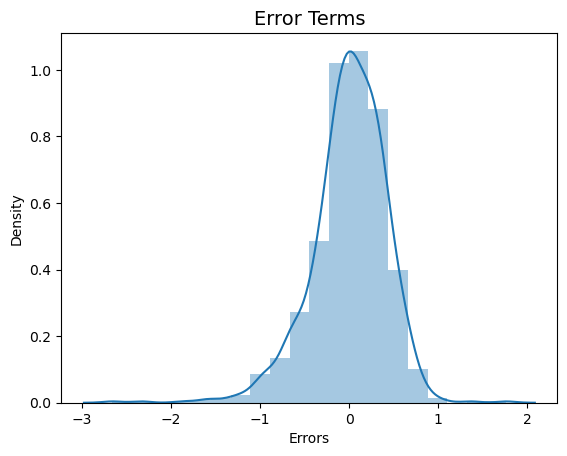

In [306]:
# Plotting the residuals for training set

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10)

## Making Predictions Using the Final Model

In [307]:
# Applying scaling on the test dataset

house_test[cont_cols_new] = scaler.transform(house_test[cont_cols_new])
house_test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
445      0.196729  0.074360    -0.087239    -0.545736     -1.436929   
1331    -0.702048  0.308813    -0.826437    -0.545736     -0.470284   
1377    -0.452388  0.364068    -0.826437    -0.545736     -1.243600   
269     -0.002999 -0.416852    -0.087239     1.212850     -0.470284   
923     -0.951708 -0.392773    -0.087239    -0.545736      0.399696   

      MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  ...  \
445    -0.611798  -0.695116 -0.673423     -0.617773     -1.244875  ...   
1331   -0.611798  -0.695116 -0.673423      1.356188      0.669852  ...   
1377   -0.611798  -0.695116 -0.673423     -0.617773     -0.766194  ...   
269     0.425183  -0.695116 -0.673423     -0.617773      0.191170  ...   
923    -0.611798   1.031755  0.582134     -0.617773     -0.766194  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
445                0               0             0             0            0   
1331               0               0             0             0            1   
1377               0               0             0             0            1   
269                0               0             0             0            1   
923                0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
445                       0                     0                     0   
1331                      0                     0                     0   
1377                      0                     0                     0   
269                       0                     0                     0   
923                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
445                      1                      0  
1331                     1                      0  
1377                     1                      0  
269                      1                      0  
923                      1                      0  

[5 rows x 221 columns]

In [308]:
house_test.describe()

LotFrontage     LotArea  OverallQual  OverallCond  YearRemodAdd  \
count   407.000000  407.000000   407.000000   407.000000    407.000000   
mean      0.036628    0.109498     0.027182    -0.081245     -0.035532   
std       0.985010    1.135666     1.001493     0.891579      0.990144   
min      -2.399738   -2.094019    -2.304832    -2.304323     -1.726923   
25%      -0.452388   -0.505184    -0.826437    -0.545736     -0.953607   
50%      -0.002999   -0.031081    -0.087239    -0.545736      0.351364   
75%       0.396457    0.525524     0.651958     0.333557      0.834686   
max       5.639325    6.827890     2.869551     2.971437      1.124680   

       MasVnrArea   ExterQual    BsmtQual  BsmtExposure  BsmtFinType1  ...  \
count  407.000000  407.000000  407.000000    407.000000    407.000000  ...   
mean    -0.030782    0.034668   -0.007083      0.046681      0.000638  ...   
std      1.050045    0.959386    1.037767      1.019904      0.998771  ...   
min     -0.611798   -0.695116   -4.440094     -0.617773     -1.723557  ...   
25%     -0.611798   -0.695116   -0.673423     -0.617773     -1.244875  ...   
50%     -0.611798   -0.695116    0.582134     -0.617773      0.191170  ...   
75%      0.282151    1.031755    0.582134      1.356188      1.148534  ...   
max      6.116657    2.758626    1.837691      2.343168      1.148534  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      407.000000           407.0     407.00000         407.0   
mean         0.007371             0.0       0.07371           0.0   
std          0.085643             0.0       0.26162           0.0   
min          0.000000             0.0       0.00000           0.0   
25%          0.000000             0.0       0.00000           0.0   
50%          0.000000             0.0       0.00000           0.0   
75%          0.000000             0.0       0.00000           0.0   
max          1.000000             0.0       1.00000           0.0   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   407.000000                  407.0            407.000000   
mean      0.879607                    0.0              0.002457   
std       0.325821                    0.0              0.049568   
min       0.000000                    0.0              0.000000   
25%       1.000000                    0.0              0.000000   
50%       1.000000                    0.0              0.000000   
75%       1.000000                    0.0              0.000000   
max       1.000000                    0.0              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            407.000000            407.000000             407.000000  
mean               0.022113              0.840295               0.078624  
std                0.147232              0.366783               0.269482  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 221 columns]

In [309]:
y_test = house_test.pop('SalePrice')
X_test = house_test

In [310]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe

X_test_sm1 = sm.add_constant(X_test)

In [311]:
y_pred = lr_model.predict(X_test_sm1)

In [312]:
r2 = r2_score(y_test, y_pred)
print("R-Squared of Test Dataset:", round(r2,4))

R-Squared of Test Dataset: 0.7424


In [313]:
# Calculating Adjusted-R-Squared value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("Adjusted R-Squared of Test Dataset:", adjusted_r2)

Adjusted R-Squared of Test Dataset: 0.7284


### Final Evaluation

- R-Squared of Train Dataset: 0.823
- R-Squared of Test Dataset:  0.7424

## Ridge Regression

In [314]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [315]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [316]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.33045813  0.53383863 -0.19567105  0.33974099 -0.16992074 -0.27977678
 -0.17206613  0.18062354  0.06068173 -0.1687497  -0.07854306  0.16135022
  0.01424423  0.40262361 -0.39088334 -0.0087469  -0.36522992 -0.41553736
 -0.14438339 -0.45269337 -0.23702223]


In [317]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8060242261967401
0.7589367934340735
184.08300933929365
87.47152524953425
0.19397577380325992
0.21491775245585812


# Lasso

In [318]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [319]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [320]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [321]:
lasso.coef_

array([ 0.32337154,  0.53970327, -0.38521419,  0.37855765, -0.26547201,
       -0.28122323, -0.520387  ,  0.31271797,  0.19344186, -0.26549654,
       -0.        ,  0.46919998,  0.33168374,  0.73948007, -0.45781272,
       -0.0082723 , -0.89665604, -0.9316727 , -0.34959404, -0.49024677,
       -0.30212437])

In [322]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8183969679119247
0.7545661207825479
172.34127745158344
89.05745538230553
0.18160303208807527
0.2188143866887114


In [324]:
betas = pd.DataFrame(index=X_train_new.columns)

In [325]:
betas['Linear'] = lr_model.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [326]:
pd.set_option('display.max_rows', None)
betas.head(100)

Linear     Ridge     Lasso
TotalBsmtSF           0.316889  0.330458  0.323372
GrLivArea             0.548152  0.533839  0.539703
MSSubClass_75        -0.896167 -0.195671 -0.385214
MSZoning_FV           0.385341  0.339741  0.378558
MSZoning_RH          -0.408927 -0.169921 -0.265472
MSZoning_RM          -0.288149 -0.279777 -0.281223
LandSlope_Sev        -1.012396 -0.172066 -0.520387
Neighborhood_Veenker  0.464717  0.180624  0.312718
HouseStyle_2.5Unf     0.829442  0.060682  0.193442
Exterior1st_BrkComm  -0.708771 -0.168750 -0.265497
Exterior1st_CBlock   -0.900034 -0.078543 -0.000000
MasVnrType_BrkFace    0.710918  0.161350  0.469200
MasVnrType_None       0.583504  0.014244  0.331684
MasVnrType_Stone      0.988601  0.402624  0.739480
ExterCond_Fa         -0.451479 -0.390883 -0.457813
ExterCond_Gd         -0.022584 -0.008747 -0.008272
Functional_Maj2      -1.095296 -0.365230 -0.896656
Functional_Mod       -1.033205 -0.415537 -0.931673
Functional_Sev       -1.064535 -0.144383 -0.349594
GarageFinish_NA      -0.489988 -0.452693 -0.490247
GarageQual_Fa        -0.349481 -0.237022 -0.302124

## Double the values of Alpha for lasso & Ridge


In [327]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.33551283  0.53013646 -0.12384565  0.29330765 -0.11270489 -0.27145464
 -0.09884981  0.11223983  0.01792975 -0.10145089 -0.04059946  0.08664394
 -0.06750141  0.30640981 -0.31428139 -0.00604228 -0.22346134 -0.26115589
 -0.07885581 -0.40242393 -0.1843186 ]
0.7980055644551559
0.7547675999828306


In [328]:
#earlier for Lasso alpha = 0.001 now 0.002
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.32792023  0.53529123 -0.16348795  0.36800941 -0.12439114 -0.27716146
 -0.03450834  0.15997483  0.         -0.         -0.          0.18663973
  0.04349454  0.45015958 -0.45953761 -0.         -0.69952298 -0.80625535
 -0.         -0.48930621 -0.26284626]
0.8096629641538291
0.7587431849368341


## Drop the Top 5 features and rebuild lasso

Top 5 features are MasVnrType_Stone, HouseStyle_2.5Unf, MasVnrType_BrkFace, MasVnrType_None, GrLivArea

In [329]:
# Drop 5 Features

X_train_new = X_train_new.drop(['MasVnrType_Stone', 'HouseStyle_2.5Unf', 'MasVnrType_BrkFace', 'MasVnrType_None', 'GrLivArea'], axis=1)

In [330]:
X_test = X_test.drop(['MasVnrType_Stone', 'HouseStyle_2.5Unf', 'MasVnrType_BrkFace', 'MasVnrType_None', 'GrLivArea'], axis=1)

In [331]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [332]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [333]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [334]:
lasso.coef_

array([ 0.56978091,  0.50013378,  0.46764775, -0.55547989, -0.44030509,
       -0.74735062,  0.2502596 , -1.05891573, -0.89654847, -0.35049004,
       -0.04670845, -1.32740368, -0.8534226 , -0.59997546, -0.84256692,
       -0.39621623])

In [335]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.5670796011317125
0.5006911970434433


After dropping the top 5 features model r2 score is very low i.e. 56% for Train and 50% for Test.

In [336]:
X_train_new.columns


Index(['TotalBsmtSF', 'MSSubClass_75', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Veenker',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'ExterCond_Fa',
       'ExterCond_Gd', 'Functional_Maj2', 'Functional_Mod', 'Functional_Sev',
       'GarageFinish_NA', 'GarageQual_Fa'],
      dtype='object')